<a href="https://colab.research.google.com/github/Fiyaaak/TUGAS-PEMBELAJARAN-SECARA-STATISTIK-DAN-OPTIMISASI/blob/main/Mini_Project_SLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Luthfia Azzahra Kusumawardhani  NIM  : 1101204102

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## CPA 1

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpa1 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPA1.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpa1[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpa1['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.446692  0.220117  0.144672  0.106003  0.082516
1  0.442455  0.219658  0.145039  0.107494  0.085354
2  0.446993  0.220535  0.144443  0.105565  0.082465
3  0.457090  0.221898  0.141954  0.101666  0.077392
4  0.447407  0.220674  0.143812  0.105975  0.082134

Label (y):
0    A
1    A
2    A
3    A
4    A
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.5
Specificity: 0.86
Accuracy: 0.68

Class: E
Sensitivity: 0.86
Specificity: 0.5
Accuracy: 0.68

Average Sensitivity: 0.68
Average Specificity: 0.68
Average Accuracy: 0.68


              precision    recall  f1-score   support

           A       0.78      0.50      0.61       100
           E       0.63      0.86      0.73       100

    accuracy                           0.68       200
   macro avg       0.71      0.68      0.67       200
weighted avg       0.71      0.68      0.67       200



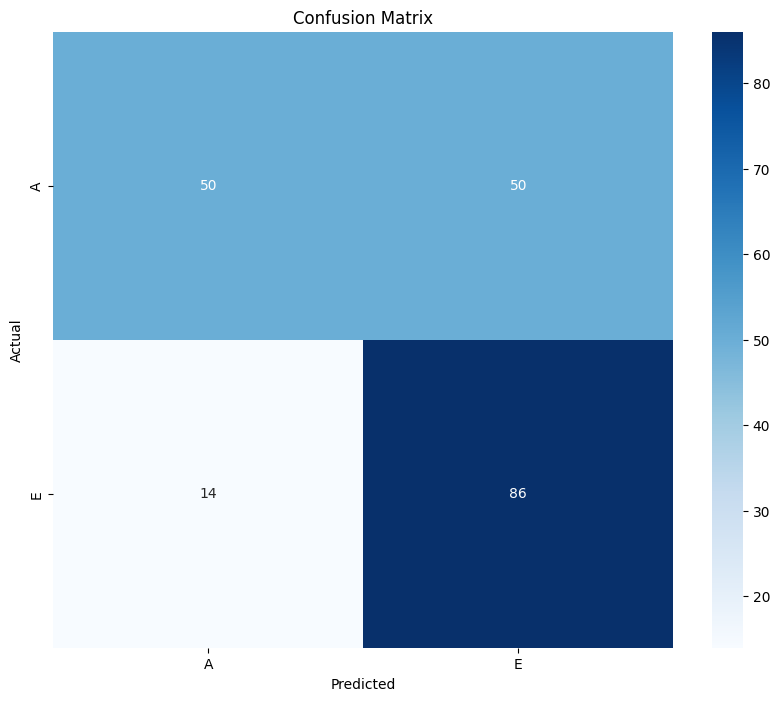

In [ ]:
    # Visualisasi confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



### 75% Training dan 25% Testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.37037037037037035
Specificity: 0.9565217391304348
Accuracy: 0.64

Class: E
Sensitivity: 0.9565217391304348
Specificity: 0.37037037037037035
Accuracy: 0.64

Average Sensitivity: 0.663
Average Specificity: 0.663
Average Accuracy: 0.64


              precision    recall  f1-score   support

           A       0.91      0.37      0.53        27
           E       0.56      0.96      0.71        23

    accuracy                           0.64        50
   macro avg       0.74      0.66      0.62        50
weighted avg       0.75      0.64      0.61        50



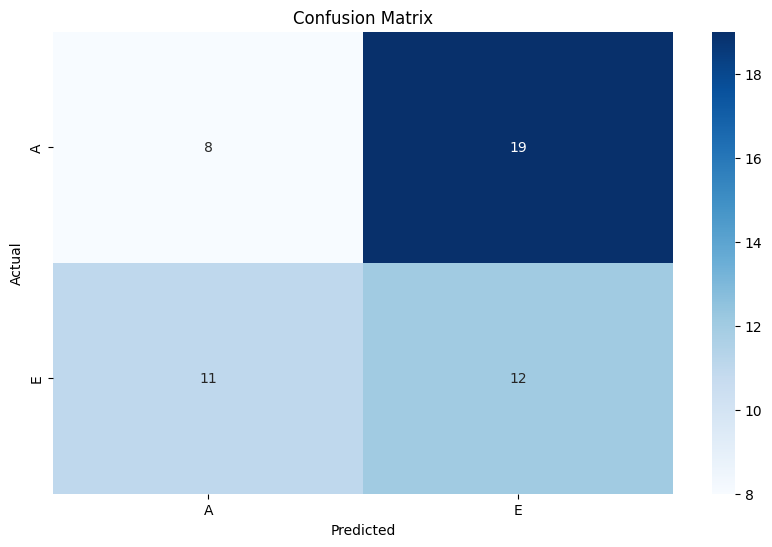

In [ ]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cpa1['kelas'].unique(), yticklabels=cpa1['kelas'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.33, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.37037037037037035
Specificity: 1.0
Accuracy: 0.66

Class: E
Sensitivity: 1.0
Specificity: 0.37037037037037035
Accuracy: 0.66

Average Sensitivity: 0.685
Average Specificity: 0.685
Average Accuracy: 0.66


              precision    recall  f1-score   support

           A       1.00      0.37      0.54        27
           E       0.57      1.00      0.73        23

    accuracy                           0.66        50
   macro avg       0.79      0.69      0.64        50
weighted avg       0.80      0.66      0.63        50



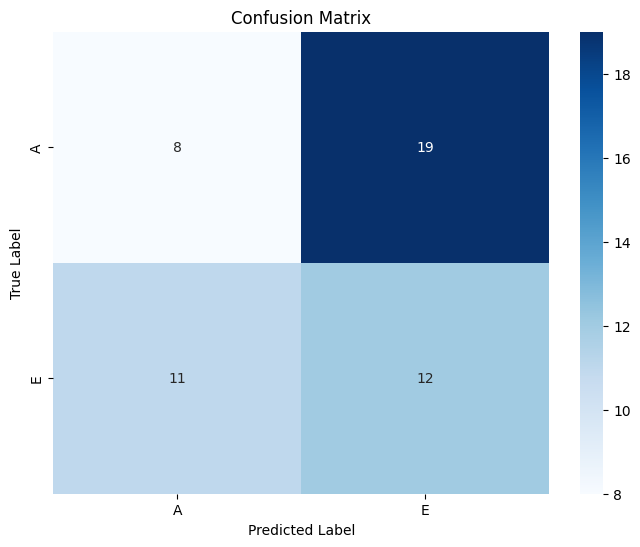

In [ ]:
# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Model K-NN**

### 10-fold CV

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.77
Specificity: 0.7
Accuracy: 0.735

Class: E
Sensitivity: 0.7
Specificity: 0.77
Accuracy: 0.735

Average Sensitivity: 0.735
Average Specificity: 0.735
Average Accuracy: 0.735


              precision    recall  f1-score   support

           A       0.72      0.77      0.74       100
           E       0.75      0.70      0.73       100

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



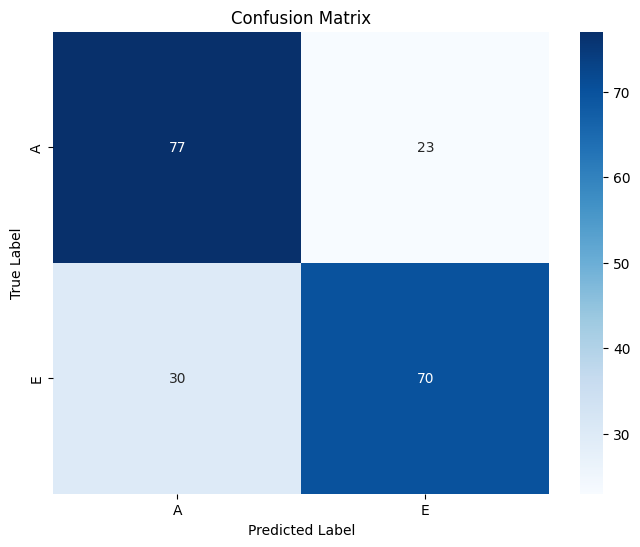

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% Training dan 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.7777777777777778
Specificity: 0.7391304347826086
Accuracy: 0.76

Class: E
Sensitivity: 0.7391304347826086
Specificity: 0.7777777777777778
Accuracy: 0.76

Average Sensitivity: 0.758454
Average Specificity: 0.758454
Average Accuracy: 0.76
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.78      0.78      0.78        27
           E       0.74      0.74      0.74        23

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



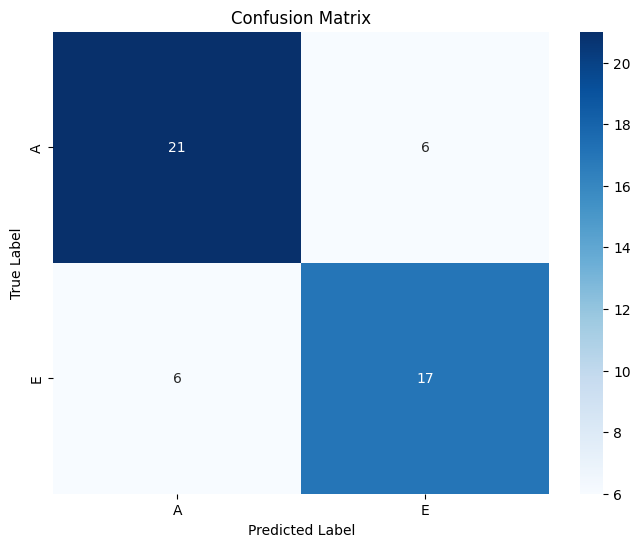

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Bagi data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42, stratify=y_train_val)

# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data validation
val_predictions = model.predict(X_val)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = np.unique(y)

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_val, val_predictions))


Class: B
Sensitivity: 0.7368421052631579
Specificity: 0.7027027027027027
Accuracy: 0.72

Class: E
Sensitivity: 0.7027027027027027
Specificity: 0.7368421052631579
Accuracy: 0.72

Average Sensitivity: 0.72
Average Specificity: 0.72
Average Accuracy: 0.72


              precision    recall  f1-score   support

           B       0.72      0.74      0.73        38
           E       0.72      0.70      0.71        37

    accuracy                           0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.72      0.72      0.72        75



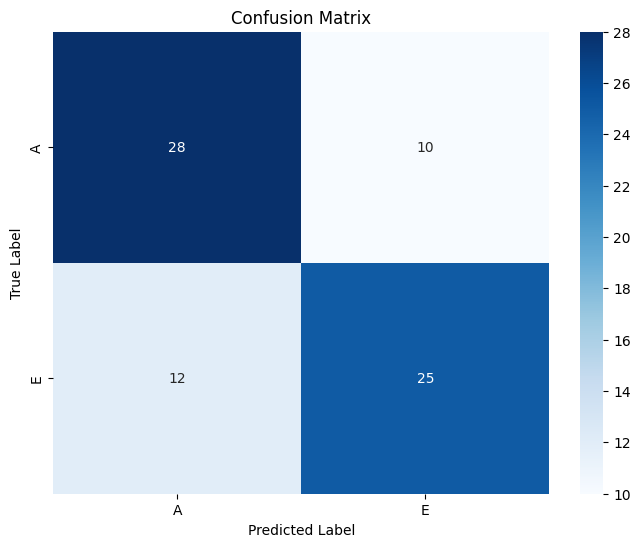

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPA 2**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpa2 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPA2.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpa2[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpa2['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.448457  0.220860  0.143938  0.104903  0.081841
1  0.448288  0.221315  0.144335  0.104964  0.081099
2  0.448916  0.221049  0.143741  0.105198  0.081096
3  0.449600  0.221141  0.144107  0.104930  0.080222
4  0.451886  0.221594  0.143987  0.103718  0.078816

Label (y):
0    B
1    B
2    B
3    B
4    B
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: B
Sensitivity: 0.63
Specificity: 0.78
Accuracy: 0.705

Class: E
Sensitivity: 0.78
Specificity: 0.63
Accuracy: 0.705

Average Sensitivity: 0.705
Average Specificity: 0.705
Average Accuracy: 0.705


              precision    recall  f1-score   support

           B       0.74      0.63      0.68       100
           E       0.68      0.78      0.73       100

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



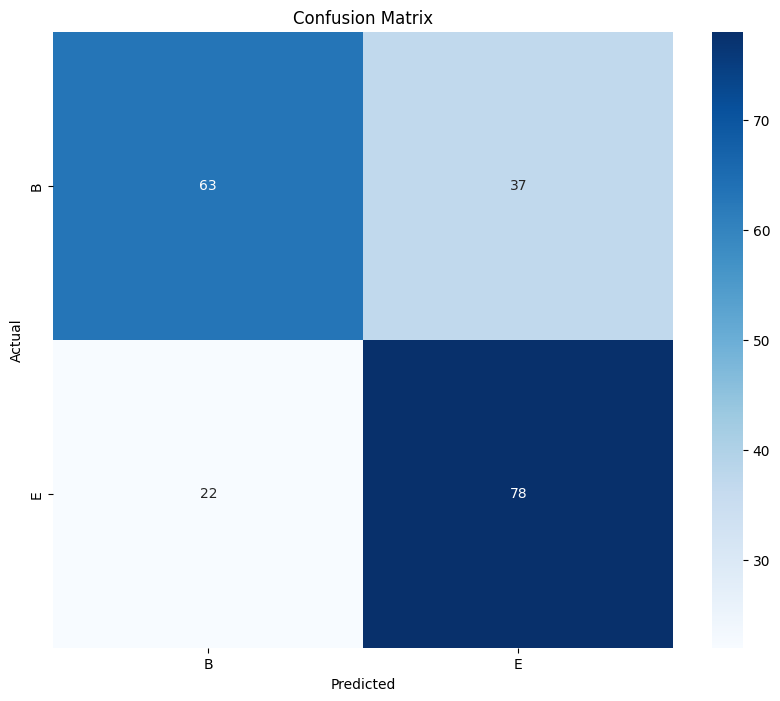

In [ ]:
    # Visualisasi confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



### 75% Training dan 25% Testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: B
Sensitivity: 0.5925925925925926
Specificity: 1.0
Accuracy: 0.78

Class: E
Sensitivity: 1.0
Specificity: 0.5925925925925926
Accuracy: 0.78

Average Sensitivity: 0.796
Average Specificity: 0.796
Average Accuracy: 0.78


              precision    recall  f1-score   support

           B       1.00      0.59      0.74        27
           E       0.68      1.00      0.81        23

    accuracy                           0.78        50
   macro avg       0.84      0.80      0.78        50
weighted avg       0.85      0.78      0.77        50



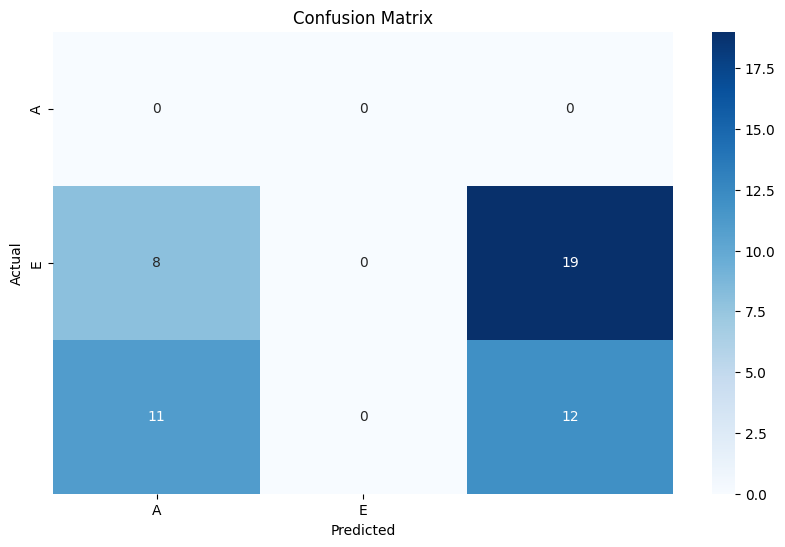

In [ ]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cpa1['kelas'].unique(), yticklabels=cpa1['kelas'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.33, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: B
Sensitivity: 0.5185185185185185
Specificity: 1.0
Accuracy: 0.74

Class: E
Sensitivity: 1.0
Specificity: 0.5185185185185185
Accuracy: 0.74

Average Sensitivity: 0.759
Average Specificity: 0.759
Average Accuracy: 0.74


              precision    recall  f1-score   support

           B       1.00      0.52      0.68        27
           E       0.64      1.00      0.78        23

    accuracy                           0.74        50
   macro avg       0.82      0.76      0.73        50
weighted avg       0.83      0.74      0.73        50



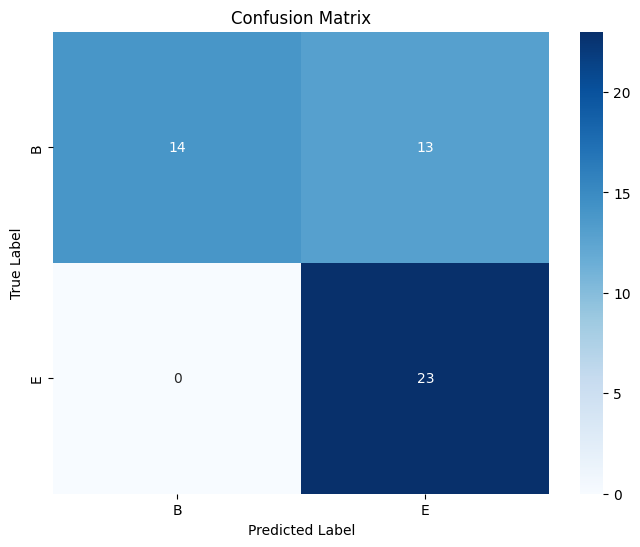

In [ ]:
# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model K-NN

### 10-fold CV

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: B
Sensitivity: 0.8
Specificity: 0.66
Accuracy: 0.73

Class: E
Sensitivity: 0.66
Specificity: 0.8
Accuracy: 0.73

Average Sensitivity: 0.73
Average Specificity: 0.73
Average Accuracy: 0.73


              precision    recall  f1-score   support

           B       0.70      0.80      0.75       100
           E       0.77      0.66      0.71       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



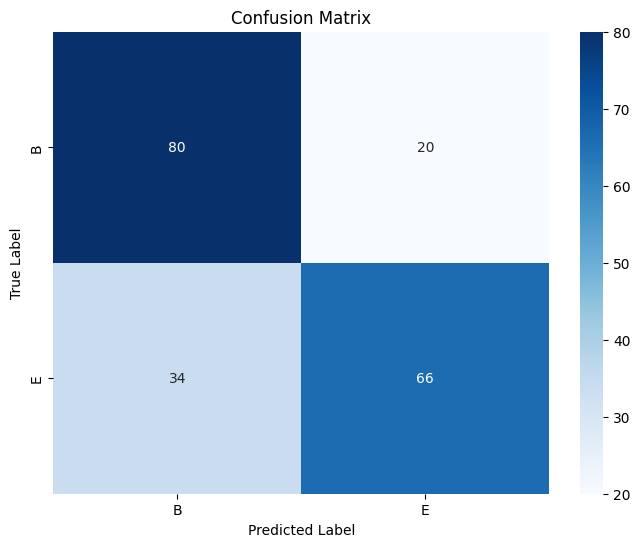

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

Class: B
Sensitivity: 0.8148148148148148
Specificity: 0.8260869565217391
Accuracy: 0.82

Class: E
Sensitivity: 0.8260869565217391
Specificity: 0.8148148148148148
Accuracy: 0.82

Average Sensitivity: 0.820451
Average Specificity: 0.820451
Average Accuracy: 0.82
Classification Report (Testing):
               precision    recall  f1-score   support

           B       0.85      0.81      0.83        27
           E       0.79      0.83      0.81        23

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



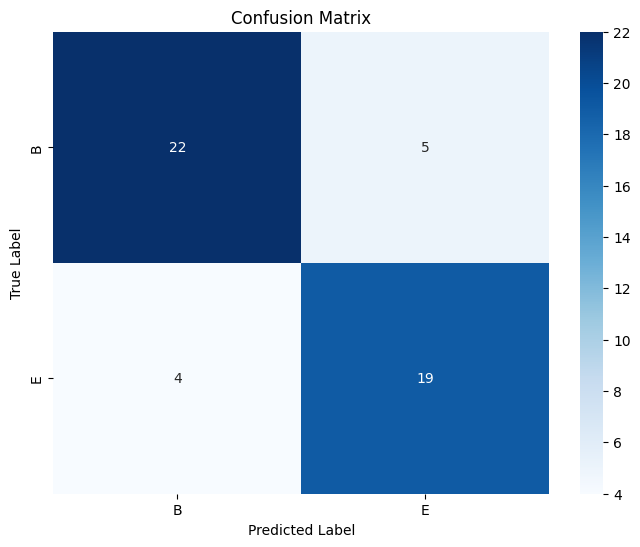

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Bagi data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42, stratify=y_train_val)

# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data validation
val_predictions = model.predict(X_val)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = np.unique(y)

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_val, val_predictions))


Class: B
Sensitivity: 0.7368421052631579
Specificity: 0.7027027027027027
Accuracy: 0.72

Class: E
Sensitivity: 0.7027027027027027
Specificity: 0.7368421052631579
Accuracy: 0.72

Average Sensitivity: 0.72
Average Specificity: 0.72
Average Accuracy: 0.72


              precision    recall  f1-score   support

           B       0.72      0.74      0.73        38
           E       0.72      0.70      0.71        37

    accuracy                           0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.72      0.72      0.72        75



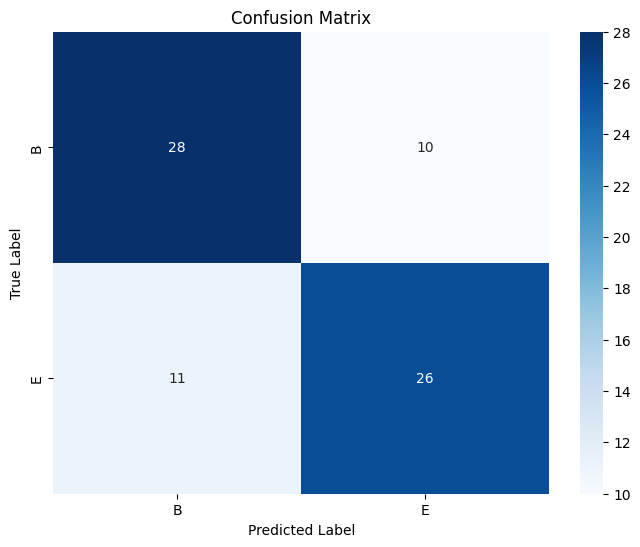

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPA 3**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpa3 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPA3.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpa3[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpa3['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.446692  0.220117  0.144672  0.106003  0.082516
1  0.442455  0.219658  0.145039  0.107494  0.085354
2  0.446993  0.220535  0.144443  0.105565  0.082465
3  0.457090  0.221898  0.141954  0.101666  0.077392
4  0.447407  0.220674  0.143812  0.105975  0.082134

Label (y):
0    A
1    A
2    A
3    A
4    A
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 1.0
Specificity: 0.0
Accuracy: 0.6666666666666666

Class: E
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.6666666666666666

Average Sensitivity: 0.5
Average Specificity: 0.5
Average Accuracy: 0.667


              precision    recall  f1-score   support

           A       0.67      1.00      0.80       200
           E       0.00      0.00      0.00       100

    accuracy                           0.67       300
   macro avg       0.33      0.50      0.40       300
weighted avg       0.44      0.67      0.53       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


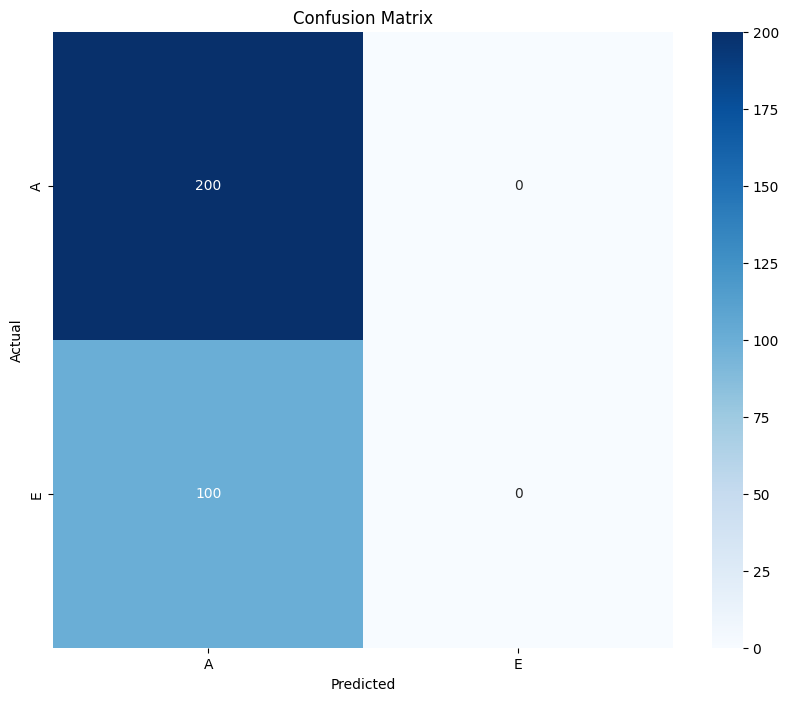

In [ ]:
    # Visualisasi confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpa3['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 1.0
Specificity: 0.0
Accuracy: 0.6666666666666666

Class: E
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.6666666666666666

Average Sensitivity: 0.5
Average Specificity: 0.5
Average Accuracy: 0.667


              precision    recall  f1-score   support

           A       0.67      1.00      0.80        50
           E       0.00      0.00      0.00        25

    accuracy                           0.67        75
   macro avg       0.33      0.50      0.40        75
weighted avg       0.44      0.67      0.53        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


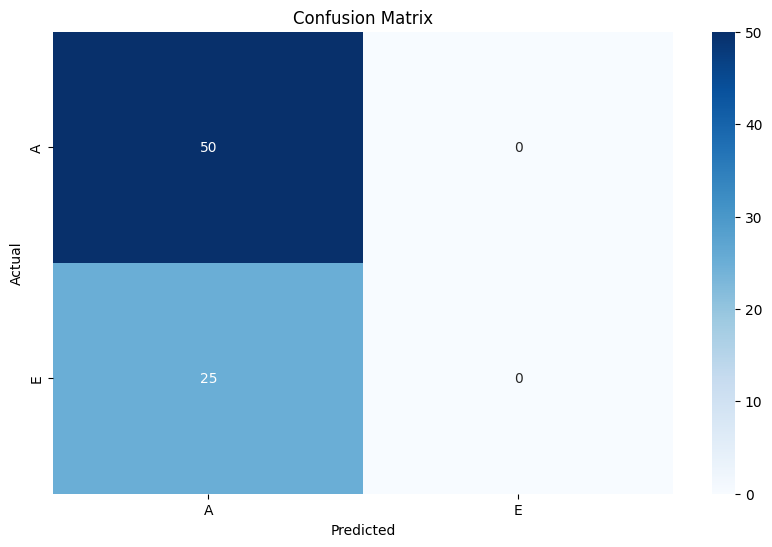

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.33, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 1.0
Specificity: 0.0
Accuracy: 0.6666666666666666

Class: E
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.6666666666666666

Average Sensitivity: 0.5
Average Specificity: 0.5
Average Accuracy: 0.667


              precision    recall  f1-score   support

           A       0.67      1.00      0.80        50
           E       0.00      0.00      0.00        25

    accuracy                           0.67        75
   macro avg       0.33      0.50      0.40        75
weighted avg       0.44      0.67      0.53        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


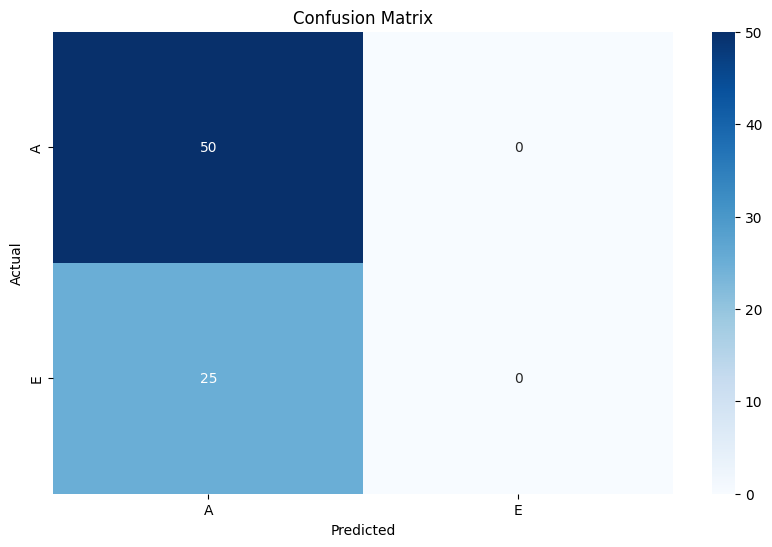

In [ ]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Model K-NN**

### 10-fold CV

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpa3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.86
Specificity: 0.54
Accuracy: 0.7533333333333333

Class: E
Sensitivity: 0.54
Specificity: 0.86
Accuracy: 0.7533333333333333

Average Sensitivity: 0.7
Average Specificity: 0.7
Average Accuracy: 0.753


              precision    recall  f1-score   support

           A       0.79      0.86      0.82       200
           E       0.66      0.54      0.59       100

    accuracy                           0.75       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.75      0.75      0.75       300



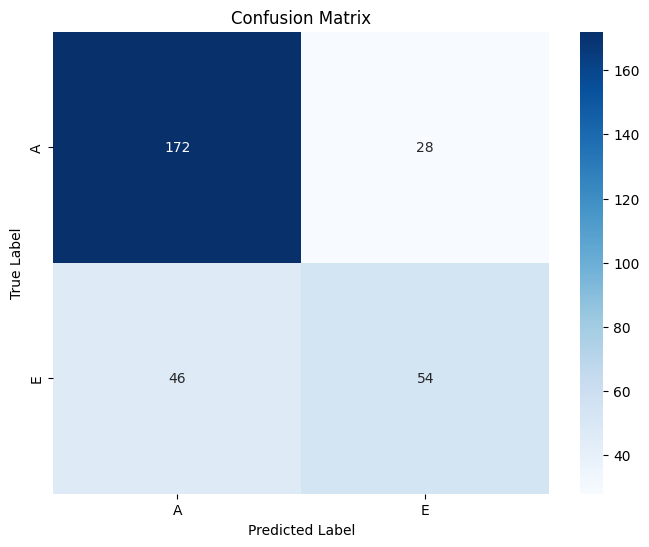

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.9
Specificity: 0.52
Accuracy: 0.7733333333333333

Class: E
Sensitivity: 0.52
Specificity: 0.9
Accuracy: 0.7733333333333333

Average Sensitivity: 0.71
Average Specificity: 0.71
Average Accuracy: 0.773333
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.79      0.90      0.84        50
           E       0.72      0.52      0.60        25

    accuracy                           0.77        75
   macro avg       0.76      0.71      0.72        75
weighted avg       0.77      0.77      0.76        75



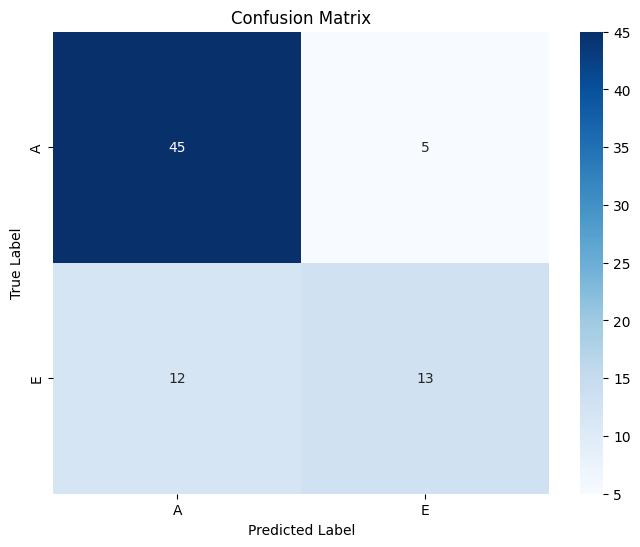

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Bagi data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42, stratify=y_train_val)

# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data validation
val_predictions = model.predict(X_val)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = np.unique(y)

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_val, val_predictions))


Class: A
Sensitivity: 0.8666666666666667
Specificity: 0.5
Accuracy: 0.7433628318584071

Class: E
Sensitivity: 0.5
Specificity: 0.8666666666666667
Accuracy: 0.7433628318584071

Average Sensitivity: 0.683
Average Specificity: 0.683
Average Accuracy: 0.743


              precision    recall  f1-score   support

           A       0.77      0.87      0.82        75
           E       0.66      0.50      0.57        38

    accuracy                           0.74       113
   macro avg       0.71      0.68      0.69       113
weighted avg       0.73      0.74      0.73       113



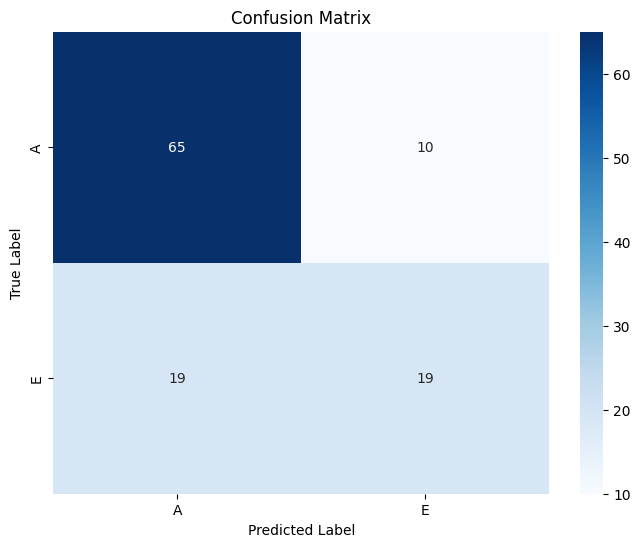

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPB 1**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpb1 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB1.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpb1[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb1['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.446692  0.220117  0.144672  0.106003  0.082516
1  0.442455  0.219658  0.145039  0.107494  0.085354
2  0.446993  0.220535  0.144443  0.105565  0.082465
3  0.457090  0.221898  0.141954  0.101666  0.077392
4  0.447407  0.220674  0.143812  0.105975  0.082134

Label (y):
0    A
1    A
2    A
3    A
4    A
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.81
Specificity: 0.92
Accuracy: 0.865

Class: C
Sensitivity: 0.92
Specificity: 0.81
Accuracy: 0.865

Average Sensitivity: 0.865
Average Specificity: 0.865
Average Accuracy: 0.865


              precision    recall  f1-score   support

           A       0.91      0.81      0.86       100
           C       0.83      0.92      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



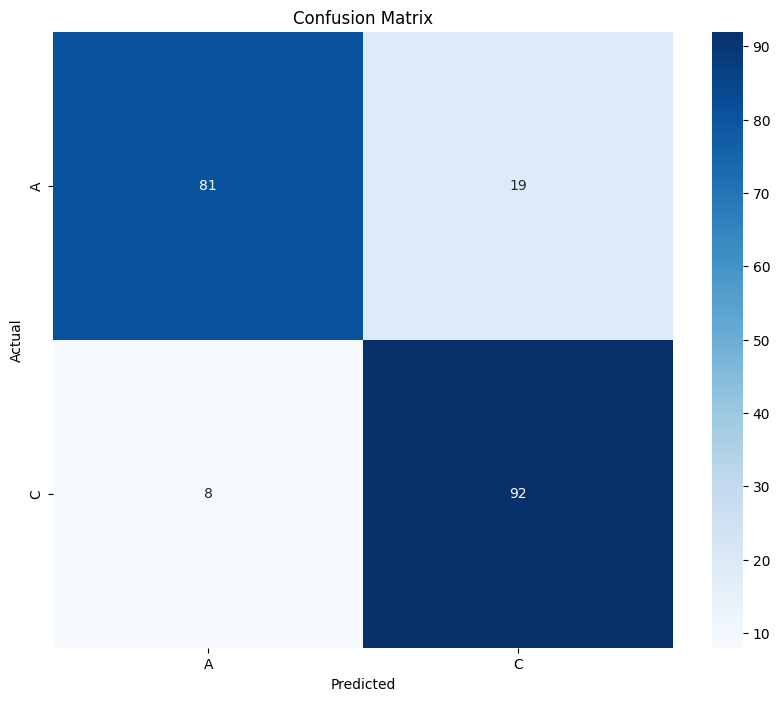

In [ ]:
    # Visualisasi confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpa3['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.8148148148148148
Specificity: 0.9130434782608695
Accuracy: 0.86

Class: C
Sensitivity: 0.9130434782608695
Specificity: 0.8148148148148148
Accuracy: 0.86

Average Sensitivity: 0.864
Average Specificity: 0.864
Average Accuracy: 0.86


              precision    recall  f1-score   support

           A       0.92      0.81      0.86        27
           C       0.81      0.91      0.86        23

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50



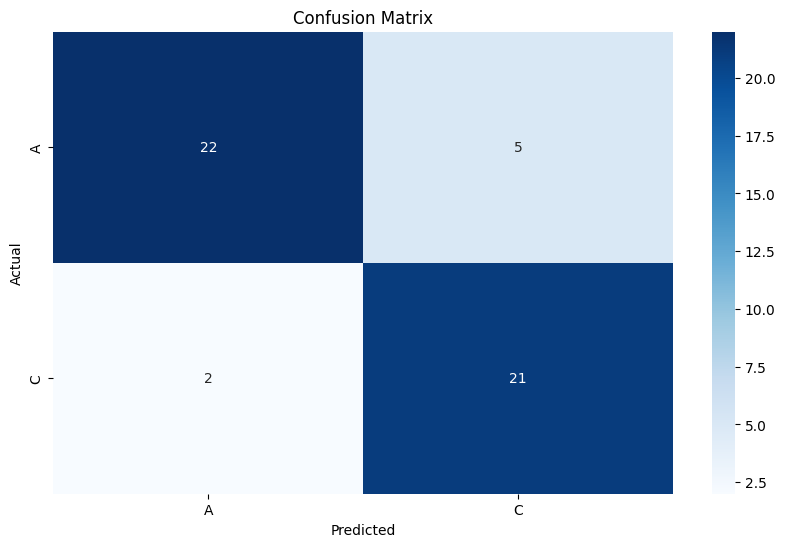

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.33, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.8148148148148148
Specificity: 0.9130434782608695
Accuracy: 0.86

Class: C
Sensitivity: 0.9130434782608695
Specificity: 0.8148148148148148
Accuracy: 0.86

Average Sensitivity: 0.864
Average Specificity: 0.864
Average Accuracy: 0.86


              precision    recall  f1-score   support

           A       0.92      0.81      0.86        27
           C       0.81      0.91      0.86        23

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.87      0.86      0.86        50



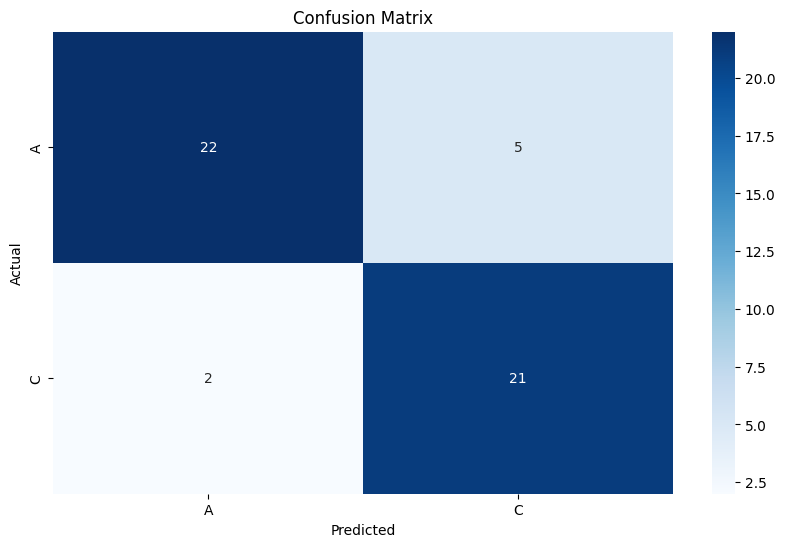

In [ ]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model K-NN

### 10-fold CV

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb1['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88

Class: C
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88

Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88


              precision    recall  f1-score   support

           A       0.88      0.88      0.88       100
           C       0.88      0.88      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



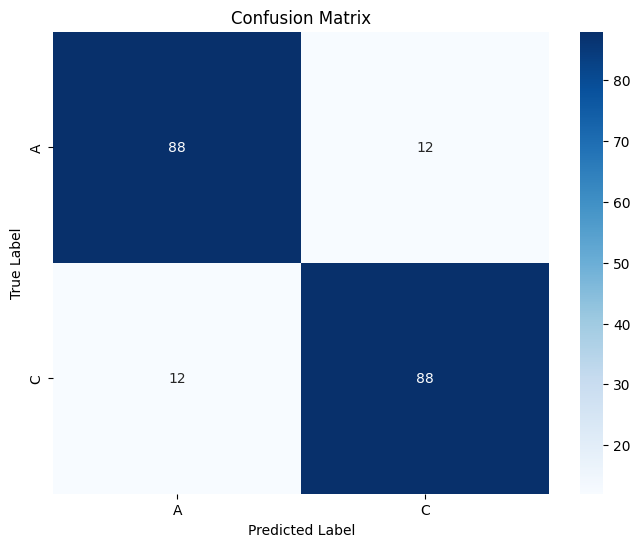

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.8888888888888888
Specificity: 0.8695652173913043
Accuracy: 0.88

Class: C
Sensitivity: 0.8695652173913043
Specificity: 0.8888888888888888
Accuracy: 0.88

Average Sensitivity: 0.879227
Average Specificity: 0.879227
Average Accuracy: 0.88
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.89      0.89      0.89        27
           C       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



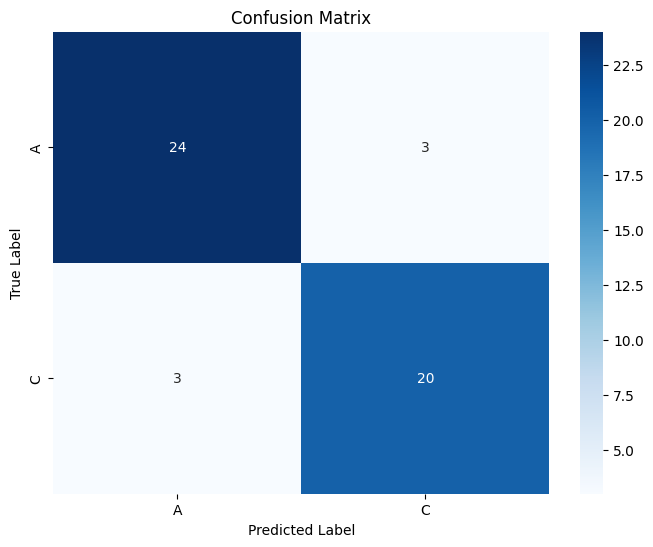

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

In [ ]:
# Bagi data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42, stratify=y_train_val)

# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data validation
val_predictions = model.predict(X_val)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = np.unique(y)

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_val, val_predictions))


Class: A
Sensitivity: 0.868421052631579
Specificity: 0.972972972972973
Accuracy: 0.92

Class: C
Sensitivity: 0.972972972972973
Specificity: 0.868421052631579
Accuracy: 0.92

Average Sensitivity: 0.921
Average Specificity: 0.921
Average Accuracy: 0.92


              precision    recall  f1-score   support

           A       0.97      0.87      0.92        38
           C       0.88      0.97      0.92        37

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



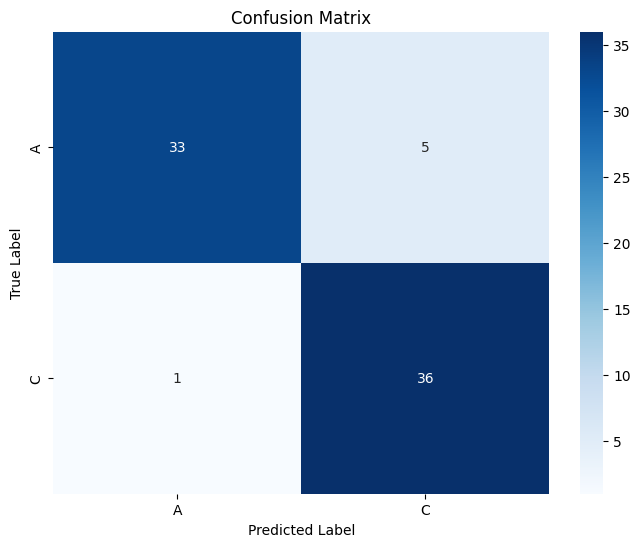

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# CPB 2

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpb2 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB2.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpb2[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb2['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.446692  0.220117  0.144672  0.106003  0.082516
1  0.442455  0.219658  0.145039  0.107494  0.085354
2  0.446993  0.220535  0.144443  0.105565  0.082465
3  0.457090  0.221898  0.141954  0.101666  0.077392
4  0.447407  0.220674  0.143812  0.105975  0.082134

Label (y):
0    A
1    A
2    A
3    A
4    A
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))

Class: A
Sensitivity: 0.82
Specificity: 0.89
Accuracy: 0.855

Class: D
Sensitivity: 0.89
Specificity: 0.82
Accuracy: 0.855

Average Sensitivity: 0.855
Average Specificity: 0.855
Average Accuracy: 0.855


              precision    recall  f1-score   support

           A       0.88      0.82      0.85       100
           D       0.83      0.89      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



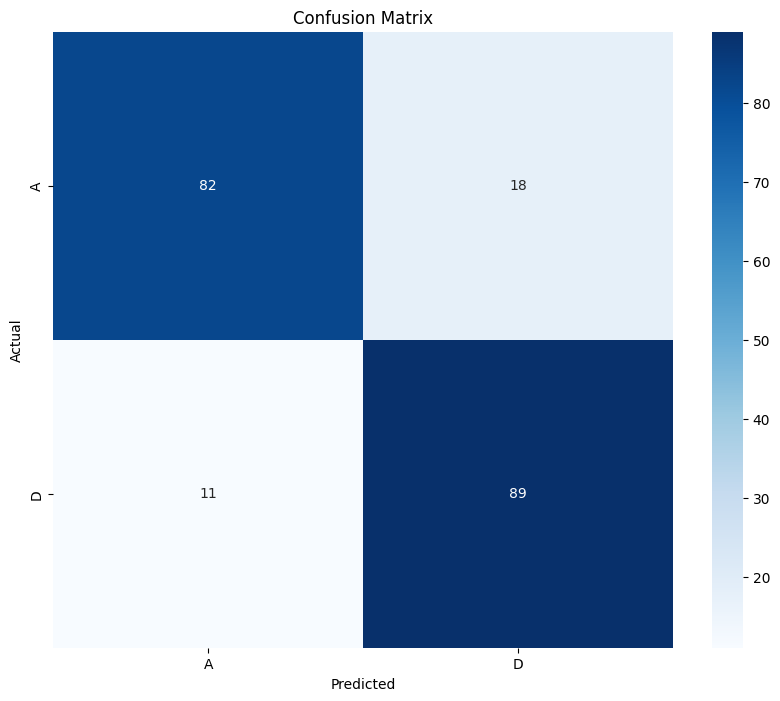

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpa3['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.8148148148148148
Specificity: 0.8695652173913043
Accuracy: 0.84

Class: D
Sensitivity: 0.8695652173913043
Specificity: 0.8148148148148148
Accuracy: 0.84

Average Sensitivity: 0.842
Average Specificity: 0.842
Average Accuracy: 0.84


              precision    recall  f1-score   support

           A       0.88      0.81      0.85        27
           D       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



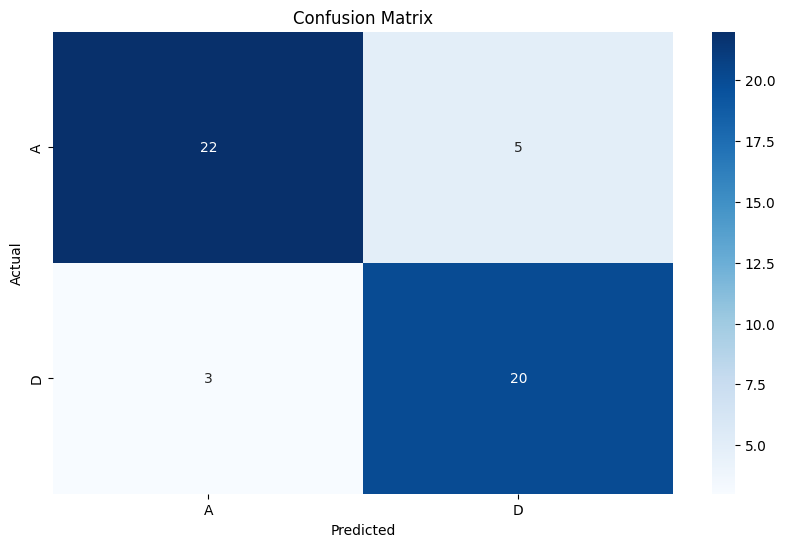

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: A
Sensitivity: 0.8148148148148148
Specificity: 0.8695652173913043
Accuracy: 0.84

Class: D
Sensitivity: 0.8695652173913043
Specificity: 0.8148148148148148
Accuracy: 0.84

Average Sensitivity: 0.842
Average Specificity: 0.842
Average Accuracy: 0.84


              precision    recall  f1-score   support

           A       0.88      0.81      0.85        27
           D       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



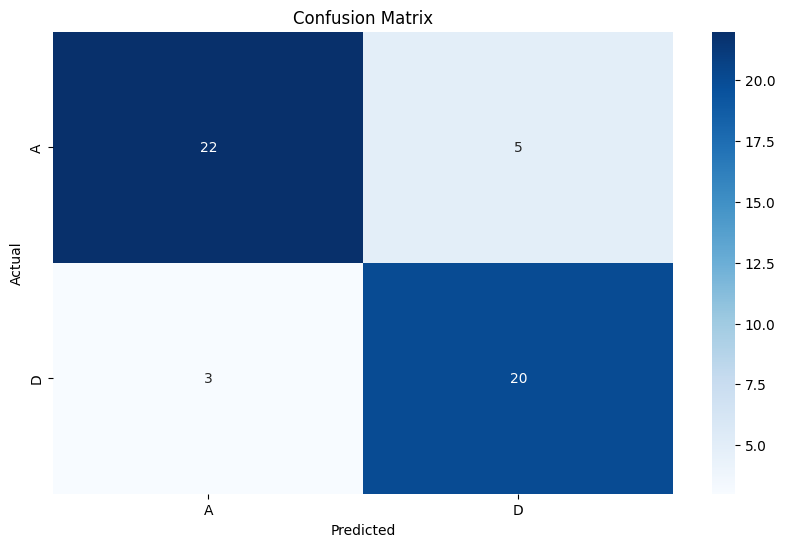

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

# Buat visualisasi confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model K-NN

### 10-fold CV

Class: A
Sensitivity: 0.8
Specificity: 0.89
Accuracy: 0.845

Class: D
Sensitivity: 0.89
Specificity: 0.8
Accuracy: 0.845

Average Sensitivity: 0.845
Average Specificity: 0.845
Average Accuracy: 0.845


              precision    recall  f1-score   support

           A       0.88      0.80      0.84       100
           D       0.82      0.89      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



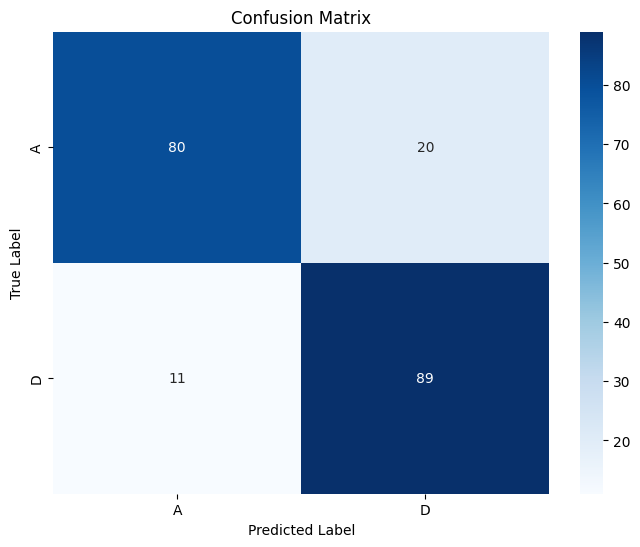

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb2['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

Class: A
Sensitivity: 0.8518518518518519
Specificity: 0.9130434782608695
Accuracy: 0.88

Class: D
Sensitivity: 0.9130434782608695
Specificity: 0.8518518518518519
Accuracy: 0.88

Average Sensitivity: 0.882448
Average Specificity: 0.882448
Average Accuracy: 0.88
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.92      0.85      0.88        27
           D       0.84      0.91      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



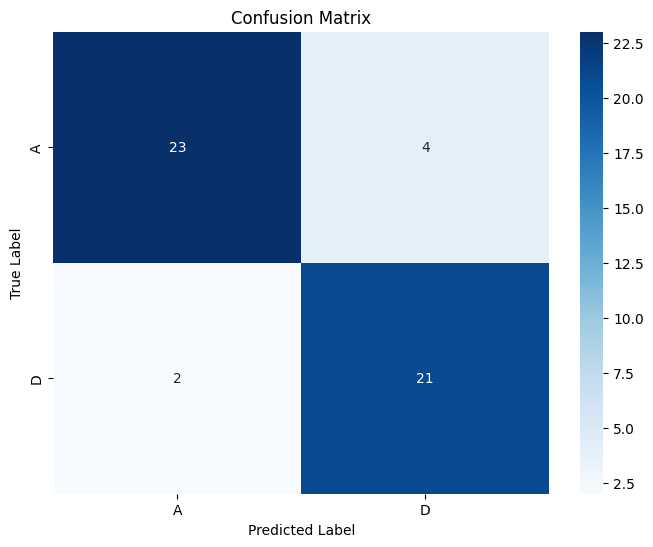

In [ ]:
#Baca file CSV untuk DataFrame
cpb2 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB2.xlsx')

# Pisahkan fitur (X) dan label (y)
X = cpb2.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb2['kelas']  # Ambil kolom 'kelas' sebagai label

# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: A
Sensitivity: 0.8148148148148148
Specificity: 0.8695652173913043
Accuracy: 0.84

Class: D
Sensitivity: 0.8695652173913043
Specificity: 0.8148148148148148
Accuracy: 0.84

Average Sensitivity: 0.84219
Average Specificity: 0.84219
Average Accuracy: 0.84
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.88      0.81      0.85        27
           D       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



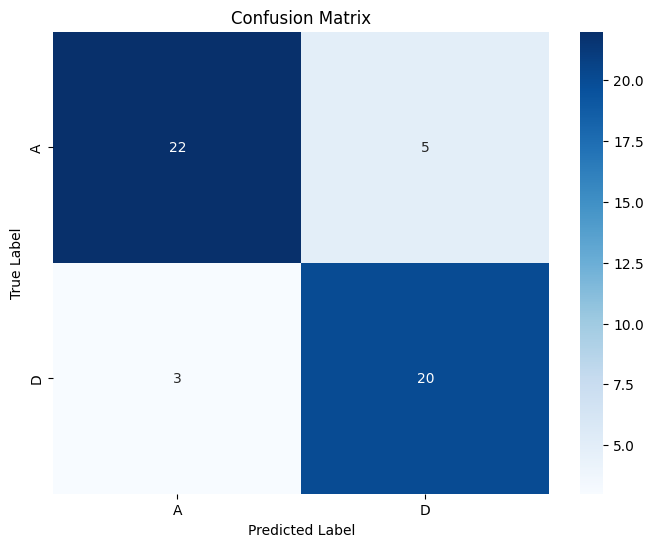

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPB 3**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpb3 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB3.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpb3[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb3['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.448457  0.220860  0.143938  0.104903  0.081841
1  0.448288  0.221315  0.144335  0.104964  0.081099
2  0.448916  0.221049  0.143741  0.105198  0.081096
3  0.449600  0.221141  0.144107  0.104930  0.080222
4  0.451886  0.221594  0.143987  0.103718  0.078816

Label (y):
0    B
1    B
2    B
3    B
4    B
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: B
Sensitivity: 0.82
Specificity: 0.89
Accuracy: 0.855

Class: C
Sensitivity: 0.89
Specificity: 0.82
Accuracy: 0.855

Average Sensitivity: 0.855
Average Specificity: 0.855
Average Accuracy: 0.855


              precision    recall  f1-score   support

           A       0.88      0.82      0.85       100
           D       0.83      0.89      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



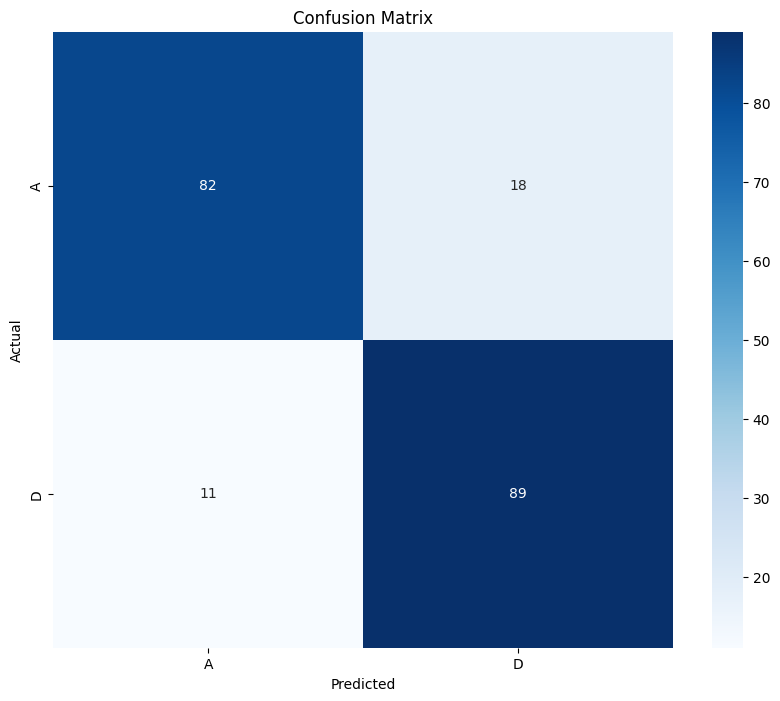

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpa3['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: B
Sensitivity: 0.8148148148148148
Specificity: 0.8695652173913043
Accuracy: 0.84

Class: C
Sensitivity: 0.8695652173913043
Specificity: 0.8148148148148148
Accuracy: 0.84

Average Sensitivity: 0.842
Average Specificity: 0.842
Average Accuracy: 0.84


              precision    recall  f1-score   support

           A       0.88      0.81      0.85        27
           D       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



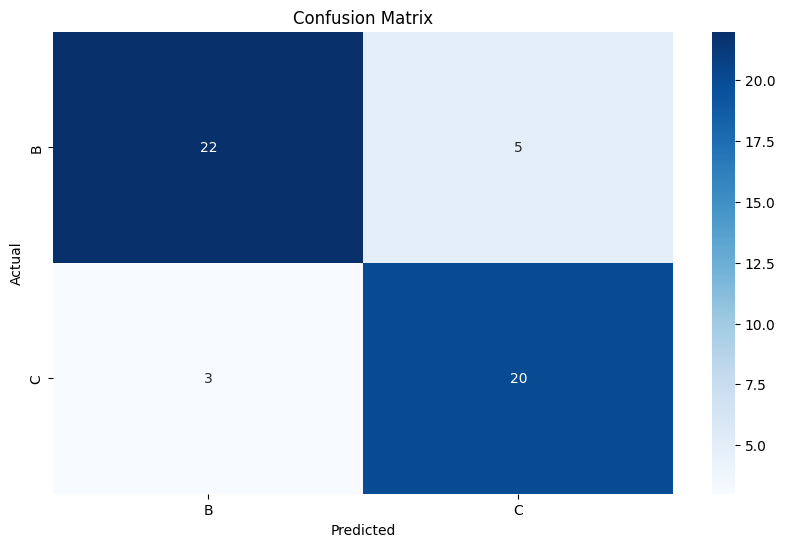

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: B
Sensitivity: 0.8148148148148148
Specificity: 0.8695652173913043
Accuracy: 0.84

Class: C
Sensitivity: 0.8695652173913043
Specificity: 0.8148148148148148
Accuracy: 0.84

Average Sensitivity: 0.842
Average Specificity: 0.842
Average Accuracy: 0.84


              precision    recall  f1-score   support

           A       0.88      0.81      0.85        27
           D       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



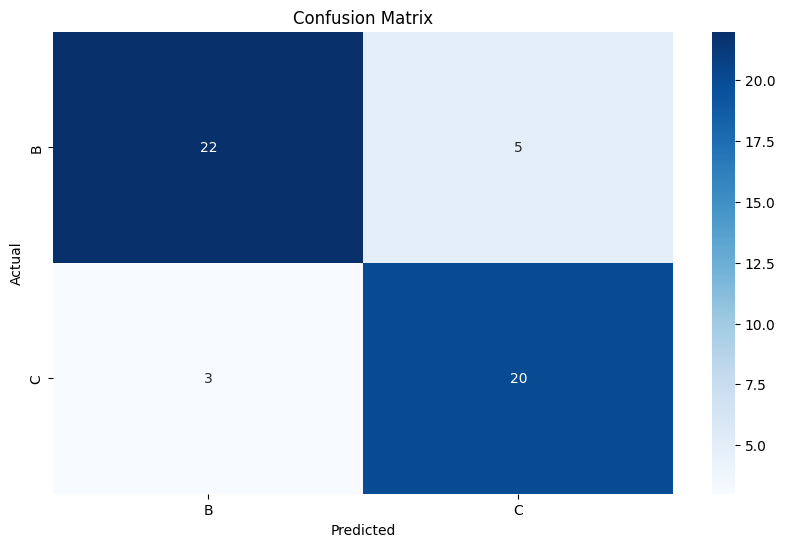

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

# Buat visualisasi confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **Model K-NN**

### 10-fold CV

Class: B
Sensitivity: 0.8
Specificity: 0.89
Accuracy: 0.845

Class: C
Sensitivity: 0.89
Specificity: 0.8
Accuracy: 0.845

Average Sensitivity: 0.845
Average Specificity: 0.845
Average Accuracy: 0.845


              precision    recall  f1-score   support

           A       0.88      0.80      0.84       100
           D       0.82      0.89      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



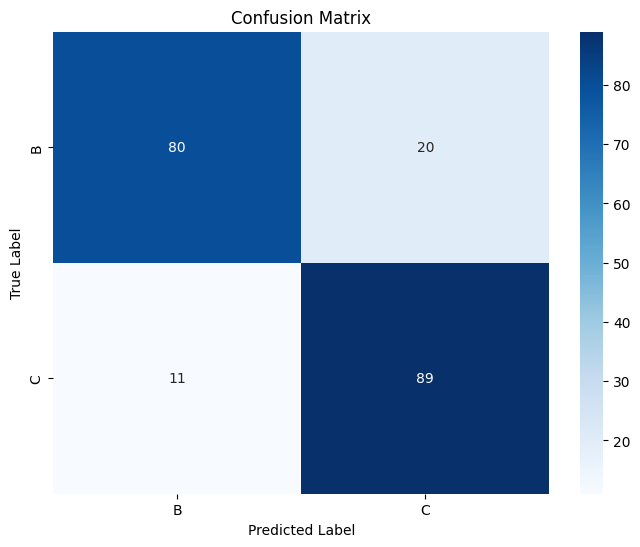

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.8695652173913043
Accuracy: 0.88

Class: C
Sensitivity: 0.8695652173913043
Specificity: 0.8888888888888888
Accuracy: 0.88

Average Sensitivity: 0.879227
Average Specificity: 0.879227
Average Accuracy: 0.88
Classification Report (Testing):
               precision    recall  f1-score   support

           B       0.89      0.89      0.89        27
           C       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



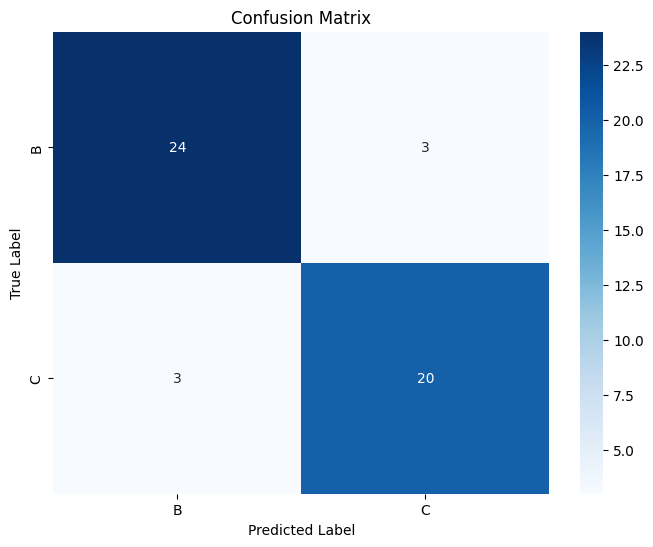

In [ ]:
#Baca file CSV untuk DataFrame
cpb3 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB3.xlsx')

# Pisahkan fitur (X) dan label (y)
X = cpb3.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb3['kelas']  # Ambil kolom 'kelas' sebagai label

# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.9130434782608695
Accuracy: 0.9

Class: C
Sensitivity: 0.9130434782608695
Specificity: 0.8888888888888888
Accuracy: 0.9

Average Sensitivity: 0.900966
Average Specificity: 0.900966
Average Accuracy: 0.9
Classification Report (Testing):
               precision    recall  f1-score   support

           B       0.92      0.89      0.91        27
           C       0.88      0.91      0.89        23

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



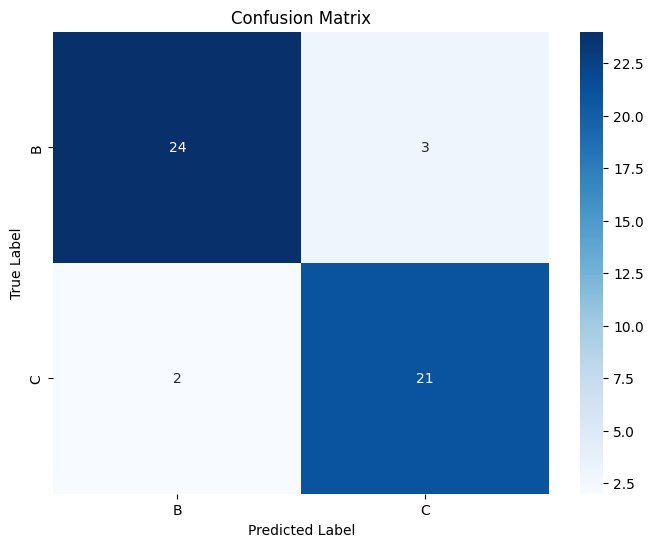

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)

# Pisahkan fitur (X) dan label (y)
X = cpb3.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb3['kelas']  # Ambil kolom 'kelas' sebagai label

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPB 4**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpb4 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB4.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpb4[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb4['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.448457  0.220860  0.143938  0.104903  0.081841
1  0.448288  0.221315  0.144335  0.104964  0.081099
2  0.448916  0.221049  0.143741  0.105198  0.081096
3  0.449600  0.221141  0.144107  0.104930  0.080222
4  0.451886  0.221594  0.143987  0.103718  0.078816

Label (y):
0    B
1    B
2    B
3    B
4    B
Name: kelas, dtype: object


## Model SVM


### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb4['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: B
Sensitivity: 0.85
Specificity: 0.95
Accuracy: 0.9

Class: D
Sensitivity: 0.95
Specificity: 0.85
Accuracy: 0.9

Average Sensitivity: 0.9
Average Specificity: 0.9
Average Accuracy: 0.9


              precision    recall  f1-score   support

           B       0.94      0.85      0.89       100
           D       0.86      0.95      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



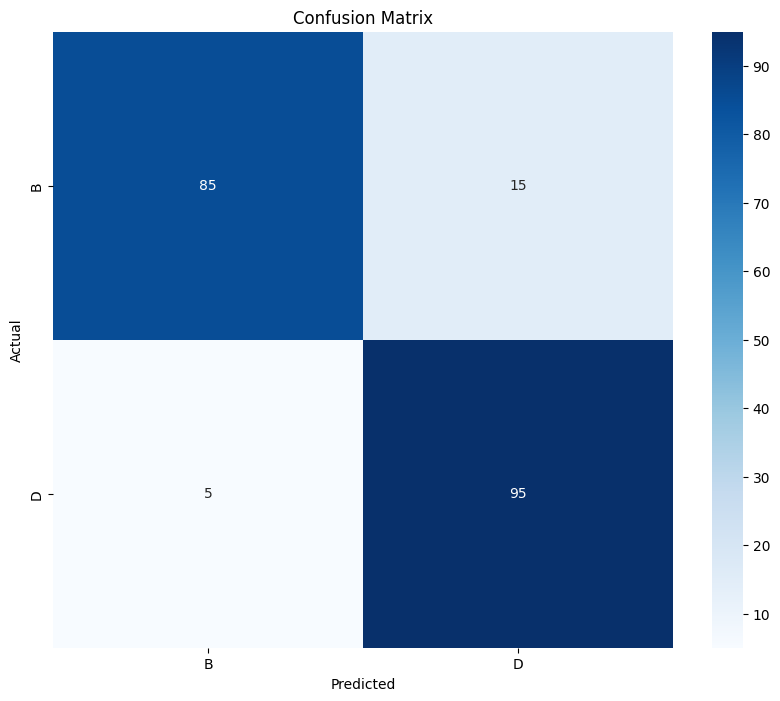

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpa3['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb4['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.8695652173913043
Accuracy: 0.88

Class: D
Sensitivity: 0.8695652173913043
Specificity: 0.8888888888888888
Accuracy: 0.88

Average Sensitivity: 0.879
Average Specificity: 0.879
Average Accuracy: 0.88


              precision    recall  f1-score   support

           B       0.89      0.89      0.89        27
           D       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



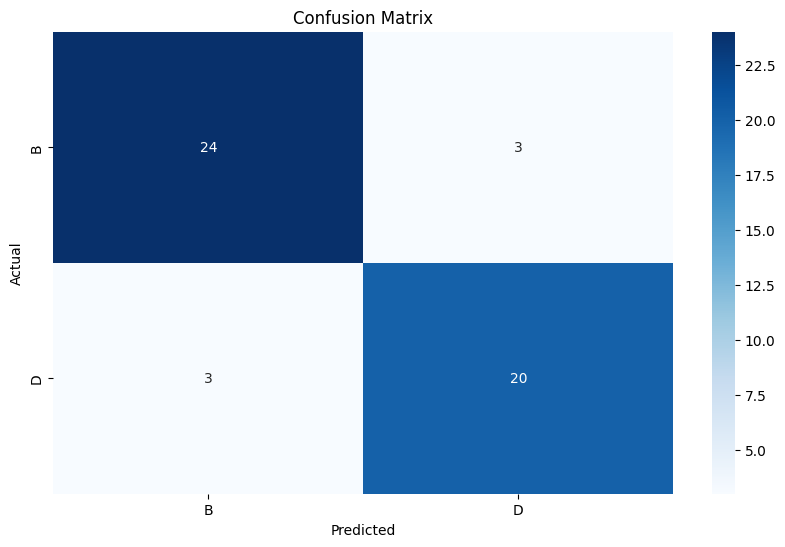

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.9565217391304348
Accuracy: 0.92

Class: C
Sensitivity: 0.9565217391304348
Specificity: 0.8888888888888888
Accuracy: 0.92

Average Sensitivity: 0.923
Average Specificity: 0.923
Average Accuracy: 0.92


              precision    recall  f1-score   support

           B       0.96      0.89      0.92        27
           D       0.88      0.96      0.92        23

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



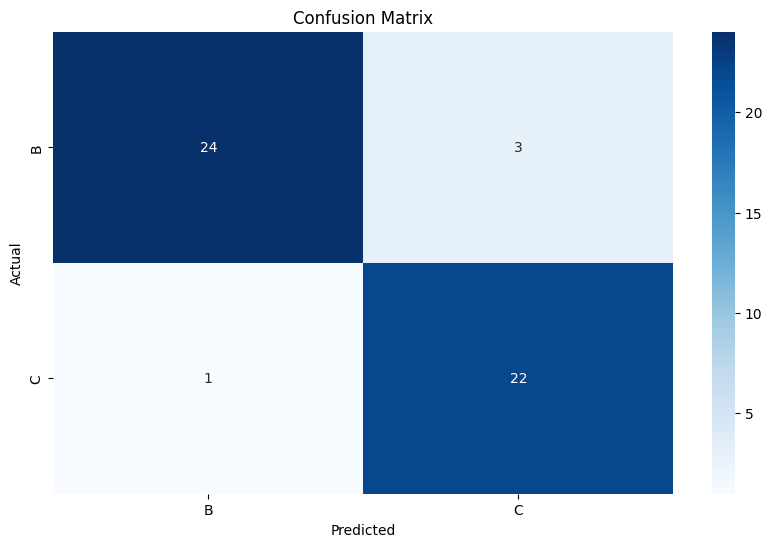

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb3['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

# Buat visualisasi confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **Model K-NN**

### 10-fold CV

Class: B
Sensitivity: 0.83
Specificity: 0.96
Accuracy: 0.895

Class: D
Sensitivity: 0.96
Specificity: 0.83
Accuracy: 0.895

Average Sensitivity: 0.895
Average Specificity: 0.895
Average Accuracy: 0.895


              precision    recall  f1-score   support

           B       0.95      0.83      0.89       100
           D       0.85      0.96      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



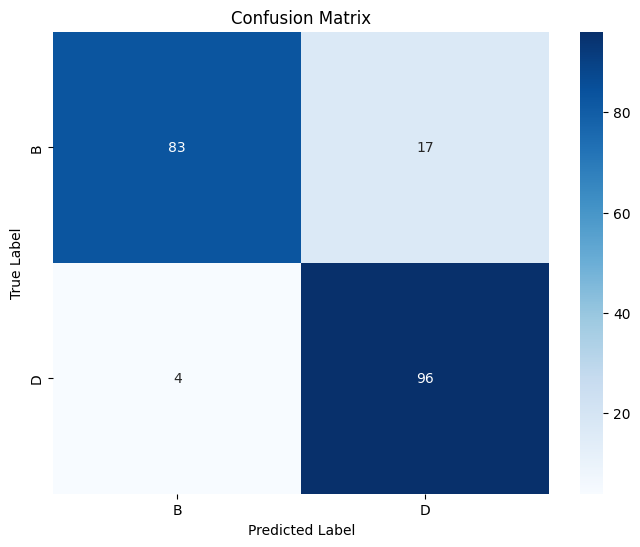

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb4['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.8695652173913043
Accuracy: 0.88

Class: D
Sensitivity: 0.8695652173913043
Specificity: 0.8888888888888888
Accuracy: 0.88

Average Sensitivity: 0.879227
Average Specificity: 0.879227
Average Accuracy: 0.88
Classification Report (Testing):
               precision    recall  f1-score   support

           B       0.89      0.89      0.89        27
           D       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



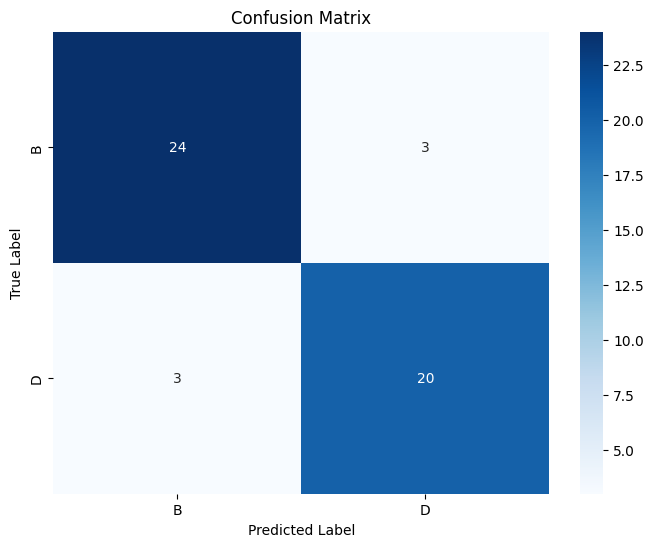

In [ ]:
#Baca file CSV untuk DataFrame
cpb3 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB3.xlsx')

# Pisahkan fitur (X) dan label (y)
X = cpb4.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb4['kelas']  # Ambil kolom 'kelas' sebagai label

# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: B
Sensitivity: 0.8888888888888888
Specificity: 0.9565217391304348
Accuracy: 0.92

Class: D
Sensitivity: 0.9565217391304348
Specificity: 0.8888888888888888
Accuracy: 0.92

Average Sensitivity: 0.922705
Average Specificity: 0.922705
Average Accuracy: 0.92
Classification Report (Testing):
               precision    recall  f1-score   support

           B       0.96      0.89      0.92        27
           D       0.88      0.96      0.92        23

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



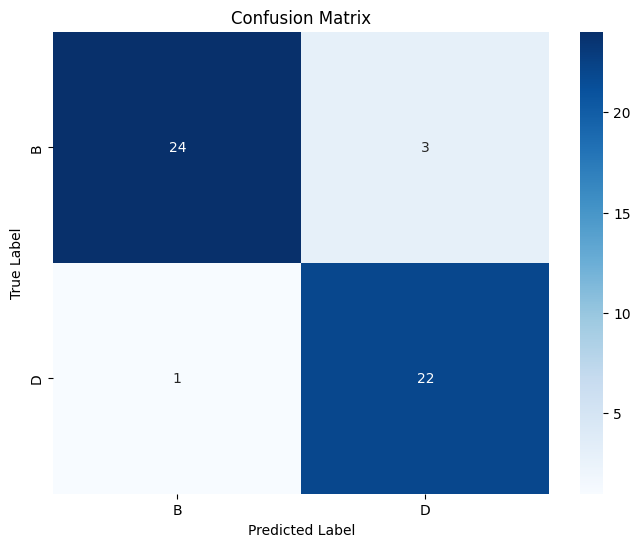

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)

# Pisahkan fitur (X) dan label (y)
X = cpb4.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb4['kelas']  # Ambil kolom 'kelas' sebagai label

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPB 5**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpb5 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB5.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpb5[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb5['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.446692  0.220117  0.144672  0.106003  0.082516
1  0.442455  0.219658  0.145039  0.107494  0.085354
2  0.446993  0.220535  0.144443  0.105565  0.082465
3  0.457090  0.221898  0.141954  0.101666  0.077392
4  0.447407  0.220674  0.143812  0.105975  0.082134

Label (y):
0    A
1    A
2    A
3    A
4    A
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb5['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.845
Specificity: 0.91
Accuracy: 0.8666666666666667

Class: C
Sensitivity: 0.91
Specificity: 0.845
Accuracy: 0.8666666666666667

Average Sensitivity: 0.878
Average Specificity: 0.878
Average Accuracy: 0.867


              precision    recall  f1-score   support

           A       0.95      0.84      0.89       200
           C       0.75      0.91      0.82       100

    accuracy                           0.87       300
   macro avg       0.85      0.88      0.86       300
weighted avg       0.88      0.87      0.87       300



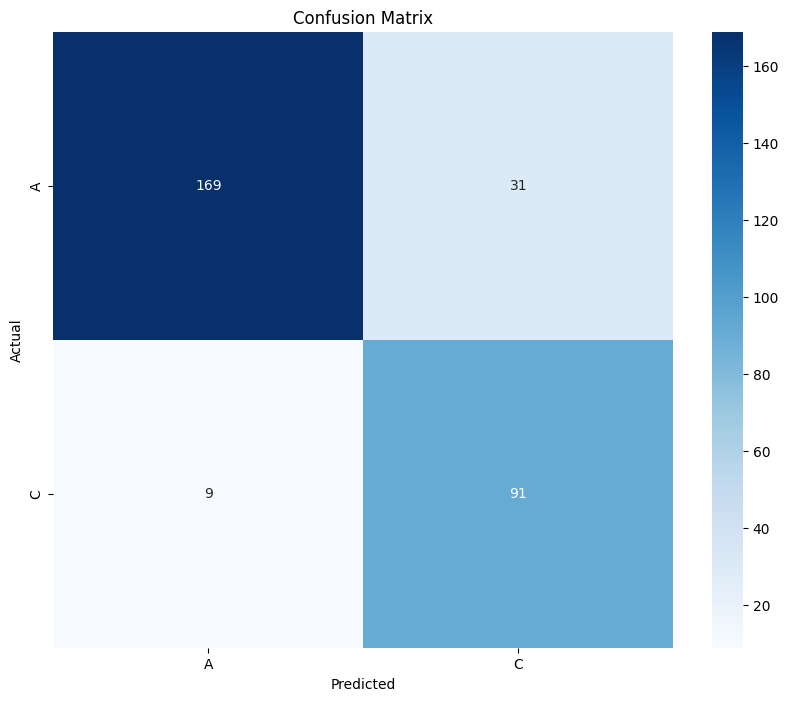

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpa3['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb5['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.86
Specificity: 0.92
Accuracy: 0.88

Class: C
Sensitivity: 0.92
Specificity: 0.86
Accuracy: 0.88

Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88


              precision    recall  f1-score   support

           A       0.96      0.86      0.91        50
           C       0.77      0.92      0.84        25

    accuracy                           0.88        75
   macro avg       0.86      0.89      0.87        75
weighted avg       0.89      0.88      0.88        75



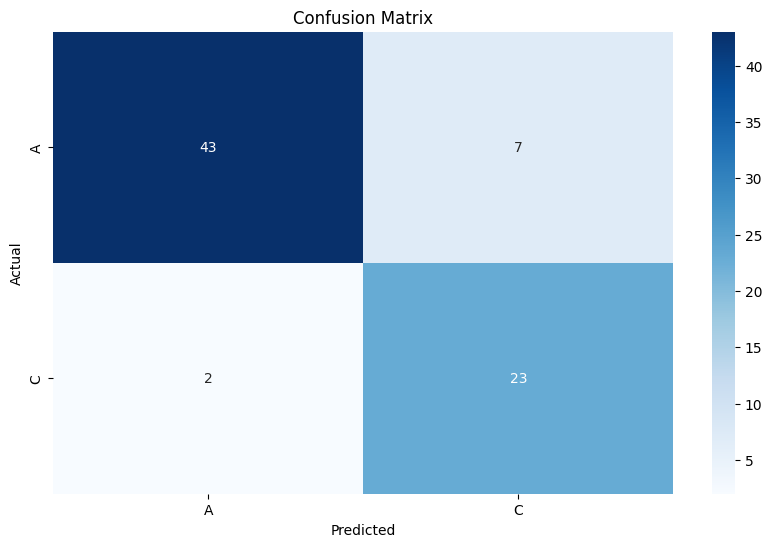

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: A
Sensitivity: 0.86
Specificity: 0.92
Accuracy: 0.88

Class: C
Sensitivity: 0.92
Specificity: 0.86
Accuracy: 0.88

Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88


              precision    recall  f1-score   support

           A       0.96      0.86      0.91        50
           C       0.77      0.92      0.84        25

    accuracy                           0.88        75
   macro avg       0.86      0.89      0.87        75
weighted avg       0.89      0.88      0.88        75



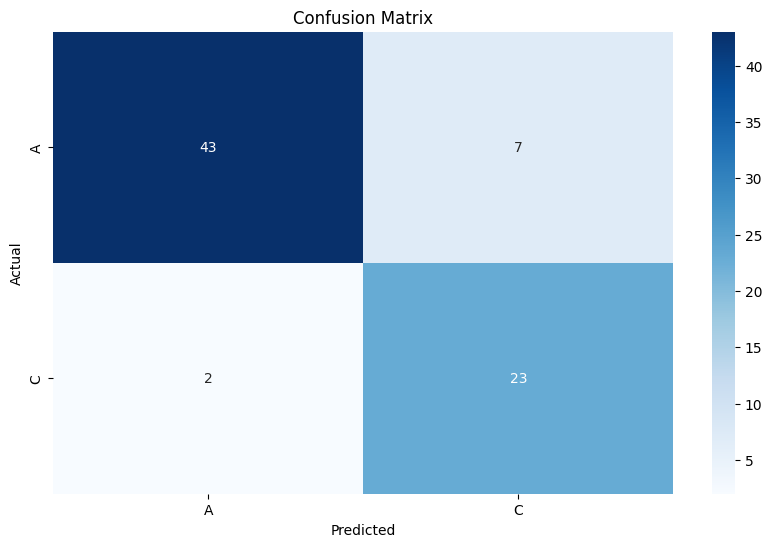

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb5['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

# Buat visualisasi confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model K-NN

### 10-fold CV

Class: B
Sensitivity: 0.89
Specificity: 0.81
Accuracy: 0.8633333333333333

Class: D
Sensitivity: 0.81
Specificity: 0.89
Accuracy: 0.8633333333333333

Average Sensitivity: 0.85
Average Specificity: 0.85
Average Accuracy: 0.863


              precision    recall  f1-score   support

           A       0.90      0.89      0.90       200
           C       0.79      0.81      0.80       100

    accuracy                           0.86       300
   macro avg       0.84      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



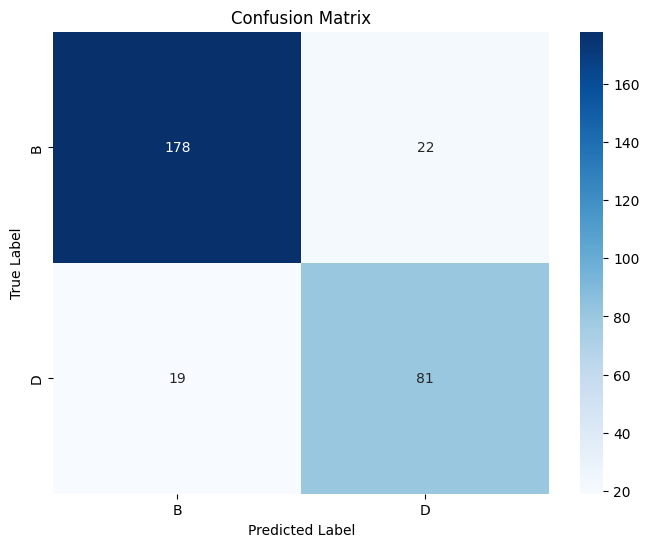

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb4['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

Class: B
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88

Class: D
Sensitivity: 0.88
Specificity: 0.88
Accuracy: 0.88

Average Sensitivity: 0.88
Average Specificity: 0.88
Average Accuracy: 0.88
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.94      0.88      0.91        50
           C       0.79      0.88      0.83        25

    accuracy                           0.88        75
   macro avg       0.86      0.88      0.87        75
weighted avg       0.89      0.88      0.88        75



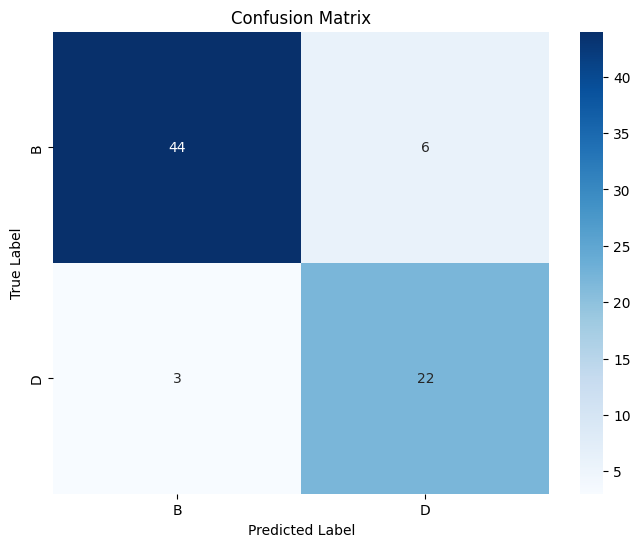

In [ ]:
#Baca file CSV untuk DataFrame
cpb3 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB3.xlsx')

# Pisahkan fitur (X) dan label (y)
X = cpb5.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb5['kelas']  # Ambil kolom 'kelas' sebagai label

# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: B
Sensitivity: 0.86
Specificity: 0.92
Accuracy: 0.88

Class: D
Sensitivity: 0.92
Specificity: 0.86
Accuracy: 0.88

Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.96      0.86      0.91        50
           C       0.77      0.92      0.84        25

    accuracy                           0.88        75
   macro avg       0.86      0.89      0.87        75
weighted avg       0.89      0.88      0.88        75



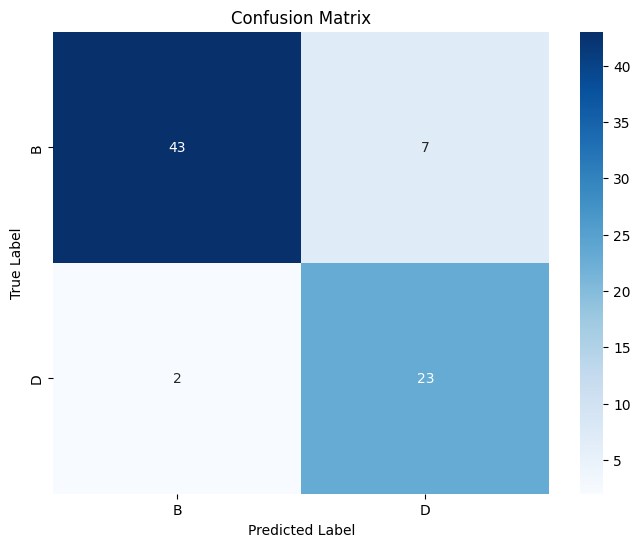

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)

# Pisahkan fitur (X) dan label (y)
X = cpb5.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb5['kelas']  # Ambil kolom 'kelas' sebagai label

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPB 6**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpb6 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB6.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpb6[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb6['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.446692  0.220117  0.144672  0.106003  0.082516
1  0.442455  0.219658  0.145039  0.107494  0.085354
2  0.446993  0.220535  0.144443  0.105565  0.082465
3  0.457090  0.221898  0.141954  0.101666  0.077392
4  0.447407  0.220674  0.143812  0.105975  0.082134

Label (y):
0    A
1    A
2    A
3    A
4    A
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb6['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.845
Specificity: 0.86
Accuracy: 0.85

Class: D
Sensitivity: 0.86
Specificity: 0.845
Accuracy: 0.85

Average Sensitivity: 0.852
Average Specificity: 0.852
Average Accuracy: 0.85


              precision    recall  f1-score   support

           A       0.92      0.84      0.88       200
           D       0.74      0.86      0.79       100

    accuracy                           0.85       300
   macro avg       0.83      0.85      0.84       300
weighted avg       0.86      0.85      0.85       300



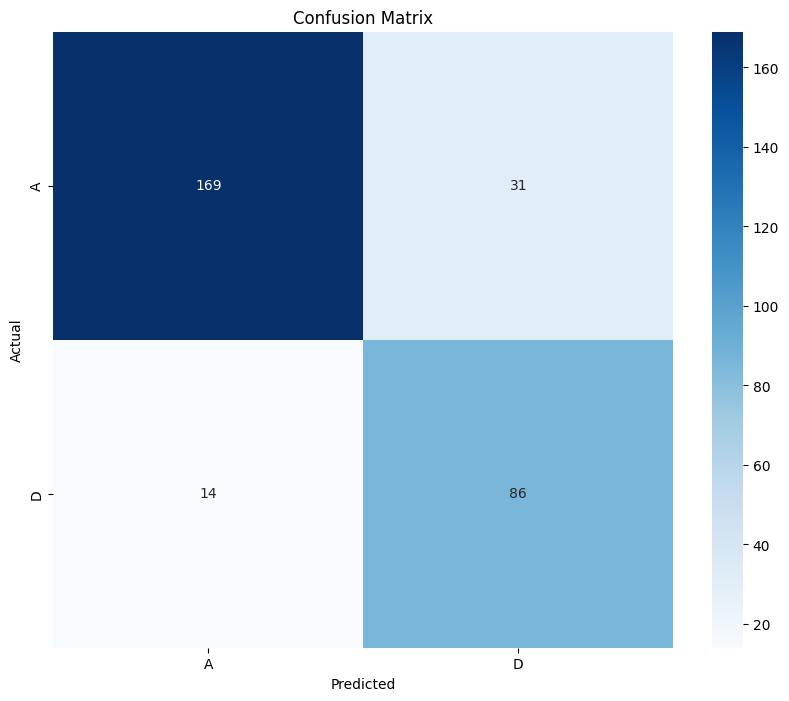

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpb6['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb6['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.86
Specificity: 0.92
Accuracy: 0.88

Class: D
Sensitivity: 0.92
Specificity: 0.86
Accuracy: 0.88

Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88


              precision    recall  f1-score   support

           A       0.96      0.86      0.91        50
           D       0.77      0.92      0.84        25

    accuracy                           0.88        75
   macro avg       0.86      0.89      0.87        75
weighted avg       0.89      0.88      0.88        75



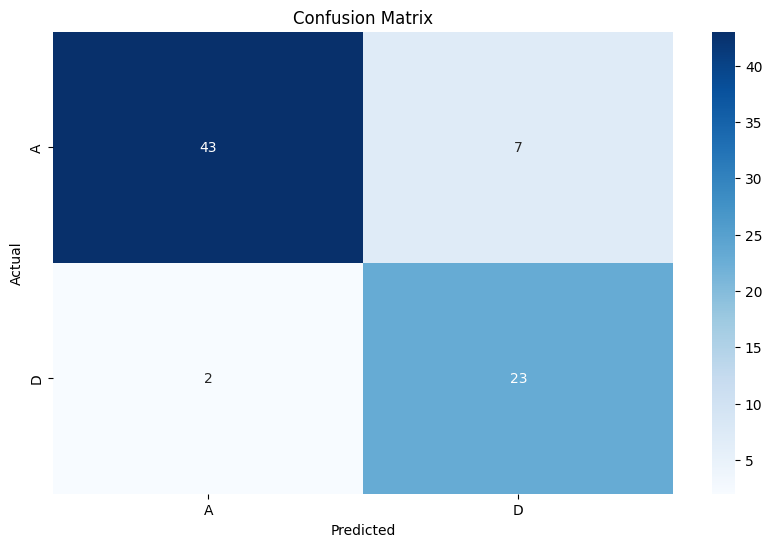

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: A
Sensitivity: 0.86
Specificity: 0.92
Accuracy: 0.88

Class: D
Sensitivity: 0.92
Specificity: 0.86
Accuracy: 0.88

Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88


              precision    recall  f1-score   support

           A       0.96      0.86      0.91        50
           D       0.77      0.92      0.84        25

    accuracy                           0.88        75
   macro avg       0.86      0.89      0.87        75
weighted avg       0.89      0.88      0.88        75



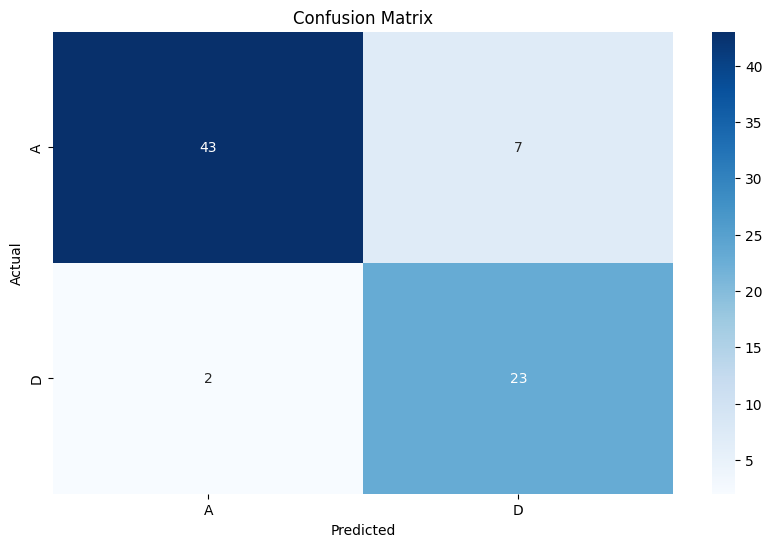

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb6['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

# Buat visualisasi confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model K-NN

### 10-fold CV

Class: A
Sensitivity: 0.83
Specificity: 0.875
Accuracy: 0.8525

Class: D
Sensitivity: 0.875
Specificity: 0.83
Accuracy: 0.8525

Average Sensitivity: 0.852
Average Specificity: 0.852
Average Accuracy: 0.852


              precision    recall  f1-score   support

           A       0.87      0.83      0.85       200
           C       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



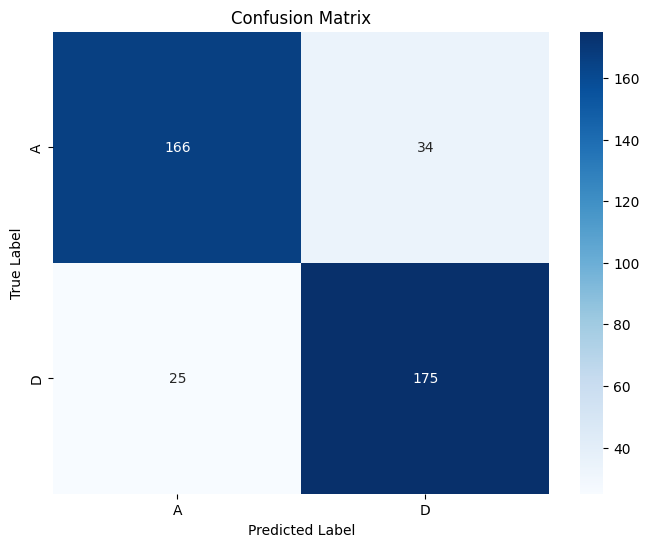

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb6['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

Class: B
Sensitivity: 0.84
Specificity: 0.88
Accuracy: 0.8533333333333334

Class: D
Sensitivity: 0.88
Specificity: 0.84
Accuracy: 0.8533333333333334

Average Sensitivity: 0.86
Average Specificity: 0.86
Average Accuracy: 0.853333
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.93      0.84      0.88        50
           D       0.73      0.88      0.80        25

    accuracy                           0.85        75
   macro avg       0.83      0.86      0.84        75
weighted avg       0.87      0.85      0.86        75



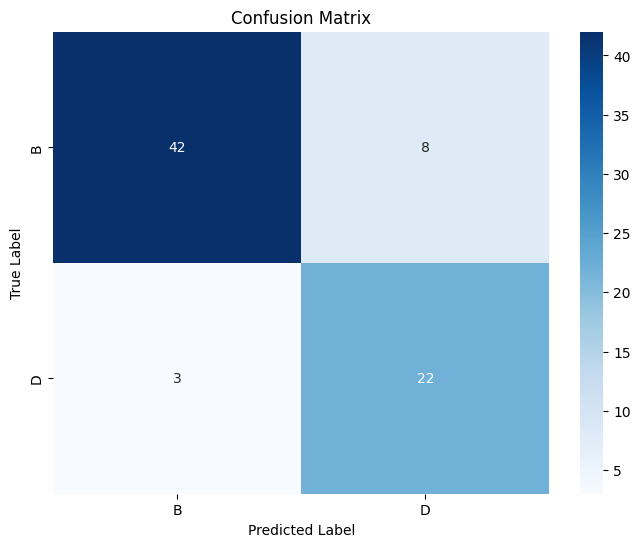

In [ ]:
#Baca file CSV untuk DataFrame
cpb6 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB6.xlsx')

# Pisahkan fitur (X) dan label (y)
X = cpb6.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb6['kelas']  # Ambil kolom 'kelas' sebagai label

# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: A
Sensitivity: 0.8653846153846154
Specificity: 0.9166666666666666
Accuracy: 0.89

Class: D
Sensitivity: 0.9166666666666666
Specificity: 0.8653846153846154
Accuracy: 0.89

Average Sensitivity: 0.891026
Average Specificity: 0.891026
Average Accuracy: 0.89
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.92      0.87      0.89        52
           C       0.86      0.92      0.89        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



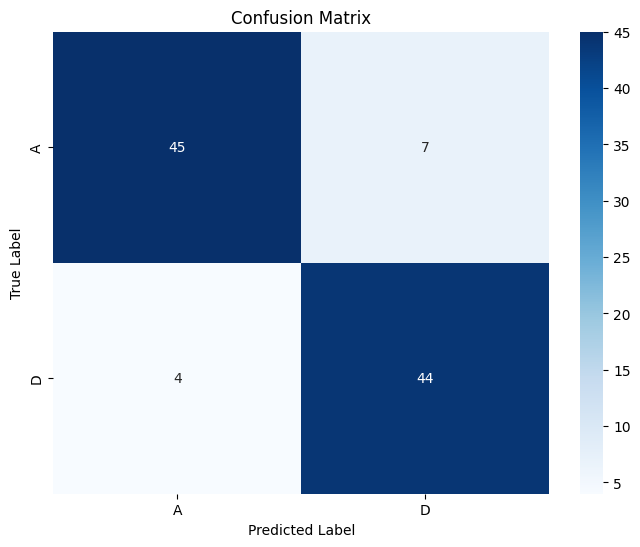

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)

# Pisahkan fitur (X) dan label (y)
X = cpb6.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb6['kelas']  # Ambil kolom 'kelas' sebagai label

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CPB 7**

In [ ]:
import pandas as pd

# Baca file CSV untuk setiap DataFrame
cpb7 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB7.xlsx')

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = cpb7[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
y = cpb7['kelas']

# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())

# Menampilkan label (y)
print("\nLabel (y):")
print(y.head())


Fitur (X):
     powLv1    powLv2    powLv3    powLv4    powLv5
0  0.446692  0.220117  0.144672  0.106003  0.082516
1  0.442455  0.219658  0.145039  0.107494  0.085354
2  0.446993  0.220535  0.144443  0.105565  0.082465
3  0.457090  0.221898  0.141954  0.101666  0.077392
4  0.447407  0.220674  0.143812  0.105975  0.082134

Label (y):
0    A
1    A
2    A
3    A
4    A
Name: kelas, dtype: object


## Model SVM

### 10-fold CV

In [ ]:
# Membuat model SVC
model = SVC(kernel='poly', degree=5, C=10)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb7['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))


Class: A
Sensitivity: 0.82
Specificity: 0.91
Accuracy: 0.865

Class: C
Sensitivity: 0.91
Specificity: 0.82
Accuracy: 0.865

Average Sensitivity: 0.865
Average Specificity: 0.865
Average Accuracy: 0.865


              precision    recall  f1-score   support

           A       0.90      0.82      0.86       200
           C       0.83      0.91      0.87       200

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



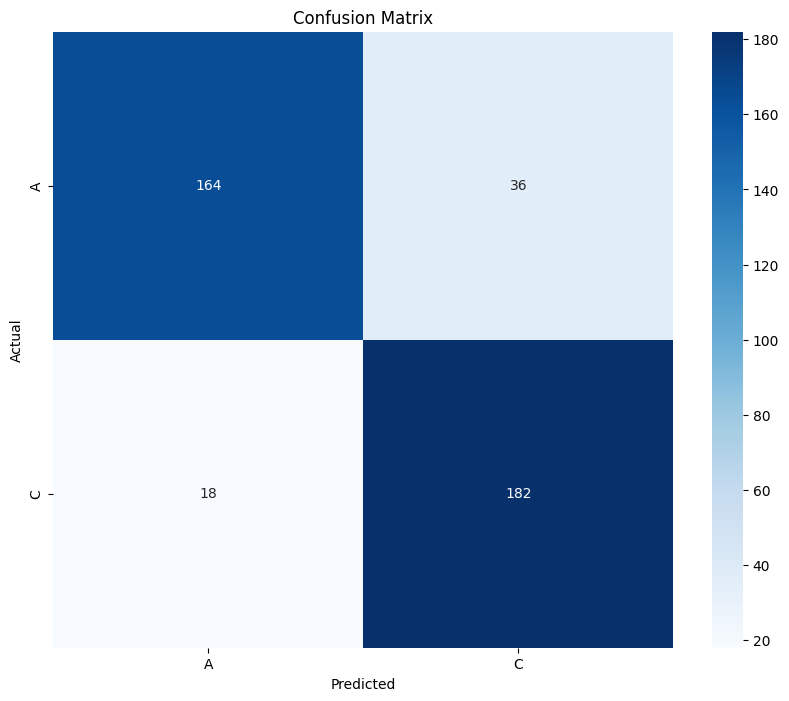

In [ ]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 75% training, 25% testing

In [ ]:
# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

classes = cpb7['kelas'].unique()

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb7['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

Class: A
Sensitivity: 0.8653846153846154
Specificity: 0.9583333333333334
Accuracy: 0.91

Class: C
Sensitivity: 0.9583333333333334
Specificity: 0.8653846153846154
Accuracy: 0.91

Average Sensitivity: 0.912
Average Specificity: 0.912
Average Accuracy: 0.91


              precision    recall  f1-score   support

           A       0.96      0.87      0.91        52
           C       0.87      0.96      0.91        48

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



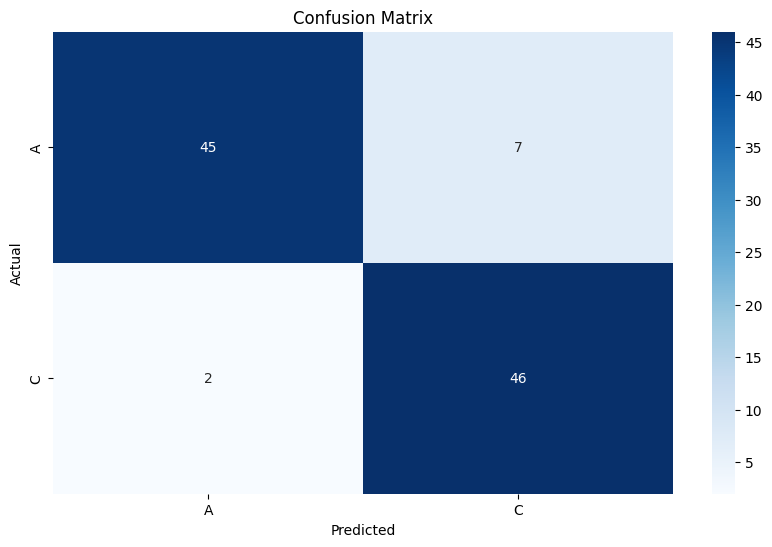

In [ ]:
# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: A
Sensitivity: 0.8653846153846154
Specificity: 0.9375
Accuracy: 0.9

Class: D
Sensitivity: 0.9375
Specificity: 0.8653846153846154
Accuracy: 0.9

Average Sensitivity: 0.901
Average Specificity: 0.901
Average Accuracy: 0.9


              precision    recall  f1-score   support

           A       0.94      0.87      0.90        52
           C       0.87      0.94      0.90        48

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



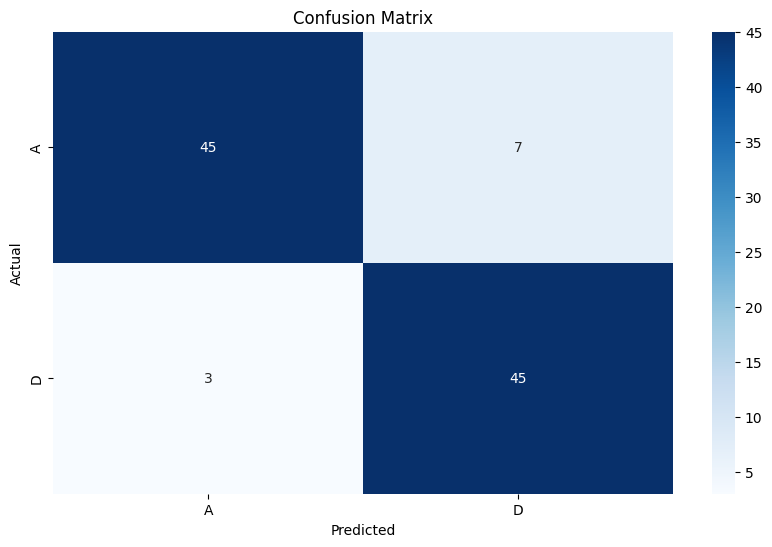

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Membuat model SVC dengan kernel polinomial, derajat 5, dan C=10
model = SVC(kernel='poly', degree=5, C=10)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb6['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y_test, test_predictions))

# Buat visualisasi confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model K-NN

### 10-fold CV

Class: A
Sensitivity: 0.83
Specificity: 0.875
Accuracy: 0.8525

Class: C
Sensitivity: 0.875
Specificity: 0.83
Accuracy: 0.8525

Average Sensitivity: 0.852
Average Specificity: 0.852
Average Accuracy: 0.852


              precision    recall  f1-score   support

           A       0.87      0.83      0.85       200
           C       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



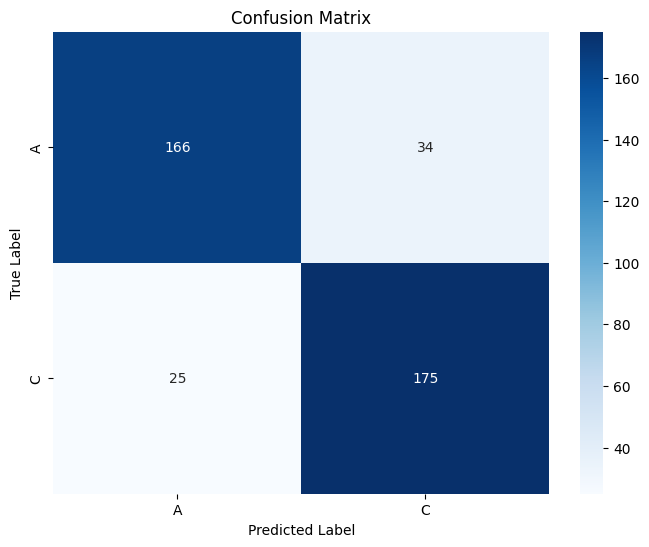

In [ ]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-Fold Cross Validation
cv_predictions = cross_val_predict(model, X, y, cv=10)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

classes = cpb7['kelas'].unique()

# Calculate Sensitivity, Specificity, and Accuracy for each class
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

avg_sensitivity = round(avg_sensitivity, 3)
avg_specificity = round(avg_specificity, 3)
avg_accuracy = round(avg_accuracy, 3)

# Print average values
print("Average Sensitivity:", avg_sensitivity)
print("Average Specificity:", avg_specificity)
print("Average Accuracy:", avg_accuracy)
print("\n")

# Mencetak nilai Sensitivity, Specificity, dan Accuracy
print(classification_report(y, cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 75% training, 25% testing

Class: A
Sensitivity: 0.8076923076923077
Specificity: 0.9166666666666666
Accuracy: 0.86

Class: D
Sensitivity: 0.9166666666666666
Specificity: 0.8076923076923077
Accuracy: 0.86

Average Sensitivity: 0.862179
Average Specificity: 0.862179
Average Accuracy: 0.86
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.91      0.81      0.86        52
           C       0.81      0.92      0.86        48

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100



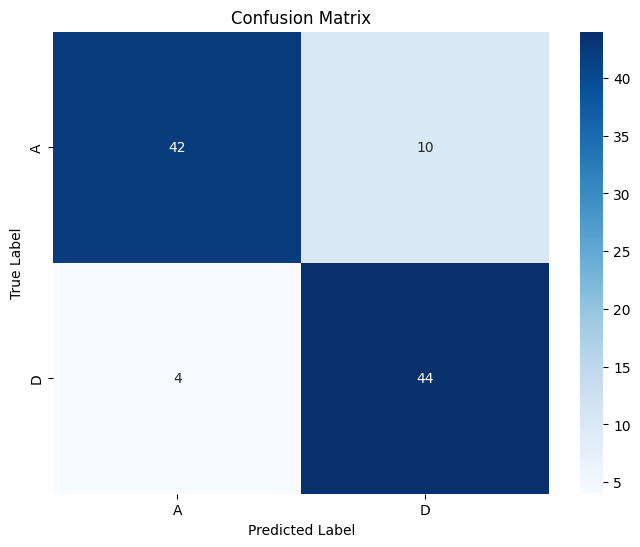

In [ ]:
#Baca file CSV untuk DataFrame
cpb7 = pd.read_excel('/content/drive/MyDrive/Dataset Assignment SLO/Dataset mini project/XLSX/CPB7.xlsx')

# Pisahkan fitur (X) dan label (y)
X = cpb7.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb7['kelas']  # Ambil kolom 'kelas' sebagai label

# Pisahkan data menjadi data training (75%) dan data testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 50% training, 25% validation, dan 25% testing

Class: A
Sensitivity: 0.86
Specificity: 0.92
Accuracy: 0.88

Class: D
Sensitivity: 0.92
Specificity: 0.86
Accuracy: 0.88

Average Sensitivity: 0.89
Average Specificity: 0.89
Average Accuracy: 0.88
Classification Report (Testing):
               precision    recall  f1-score   support

           A       0.96      0.86      0.91        50
           D       0.77      0.92      0.84        25

    accuracy                           0.88        75
   macro avg       0.86      0.89      0.87        75
weighted avg       0.89      0.88      0.88        75



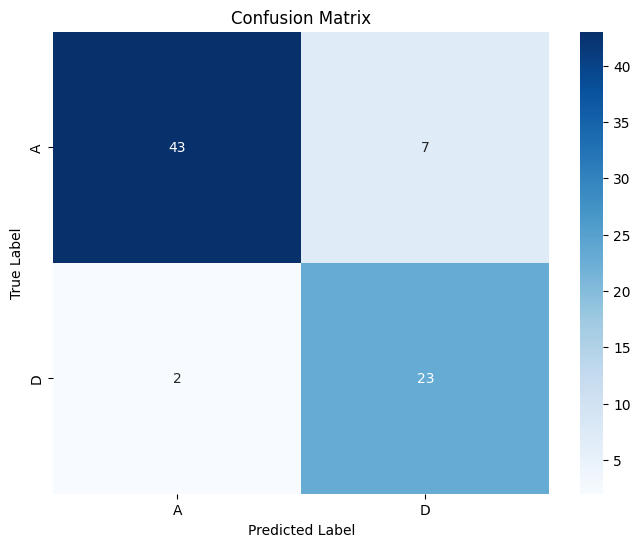

In [ ]:
# Pisahkan data menjadi data training (50%), data validasi (25%), dan data testing (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)

# Pisahkan fitur (X) dan label (y)
X = cpb7.drop('kelas', axis=1)  # Drop kolom 'kelas' dari fitur
y = cpb7['kelas']  # Ambil kolom 'kelas' sebagai label

# Membuat model KNN dengan 5 tetangga terdekat
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model menggunakan data training
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data testing
test_predictions = model.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate TP, TN, FP, FN using NumPy
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Menghitung Sensitivity, Specificity, dan Accuracy untuk setiap kelas
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the results for each class
for i, class_name in enumerate(classes):
    print("Class:", class_name)
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print("Accuracy:", accuracy[i])
    print()

# Calculate average values
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_accuracy = np.mean(accuracy)

# Print average values
print("Average Sensitivity:", round(avg_sensitivity, 6))
print("Average Specificity:", round(avg_specificity, 6))
print("Average Accuracy:", round(avg_accuracy, 6))

# Print classification report
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()